# Problem Statement


To predict the salary of employee based on the information provided in the dataset.

## Inputs 

Data is taken from Kaggle

Link to the dataset - https://www.kaggle.com/datasets/pavanelisetty/salarypredictions

## How will the company profit from this solution?
1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location , employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own on basis of that data.
4. They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, Education qualification, etc. that will reduce spending of extra  money.

## How will the employee profit from this solution?

1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title, experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working on that factor. 
4. They can get data about salaries paid by other companies for same job title, experience, education qualification, etc so they can to get a raise in their salaries.



## Dataset Desciption

The dataset folder contains the following files:

train_dataset.csv = (1000000 x 8)

train_salaries.csv = (1000000 x 2)

test_dataset.csv =  (1000000 x 8)

Columns Provided in the Dataset

1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry
7. yearsExperience
8. milesFromMetropolis
9. salary

In [4]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# Importing data set as google sheet from G-drive into colab

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [110]:
# to convert google sheet into pandas dataframe

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1g4GC4h0lK1U6yJyfjUpefjpCU2xC7flbUPugwgtBzMk/edit#gid=818792336')
sheet = wb.worksheet('train_dataset.csv')
data = sheet.get_all_values()
train = pd.DataFrame(data)
train.columns = train.iloc[0] # for putting first row as column header
train = train.iloc[1:] # remaining as values

In [7]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1T1TuTOshvhCGP-_UrXmGWLHL4dNXMQSsF43w_y4157o/edit#gid=175808699')
sheet = wb.worksheet('train_salaries.csv')
data = sheet.get_all_values()
salary = pd.DataFrame(data)
salary.columns = salary.iloc[0] 
salary = salary.iloc[1:]

In [8]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1--2ABnaJ2dGzJktemIO6yH3zhXnNkoCZ4OaibAiknlw/edit#gid=1560741212')
sheet = wb.worksheet('test_dataset.csv')
data = sheet.get_all_values()
test = pd.DataFrame(data)
test.columns = test.iloc[0] 
test = test.iloc[1:]

In [9]:
# Load the train_dataset, train_salaries, test_dataset
# train = pd.read_csv('https://docs.google.com/spreadsheets/d/17TzS_ziS1maDz6vvhkR-AotbDmZpr7N4m_ZiH5VyUjM/edit#gid=1452075911')
# salary = pd.read_csv('/content/drive/MyDrive/salary_dataset/train_salaries.gsheet')
# test = pd.read_csv('https://docs.google.com/spreadsheets/d/1ql2jpRXL3hTvGWKQ35QEK8FXsbZyw6Lpv1qTdlkPVAc/edit#gid=2144970336')

In [10]:
# Adding salary data to train_dataset
train = pd.merge(train, salary, how='inner', on='jobId')

In [11]:
# since we infer data from google sheet, columns are by default as string
train[['yearsExperience', 'milesFromMetropolis','salary']] = train[['yearsExperience', 'milesFromMetropolis','salary']].astype('int')

In [12]:
# since we infer data from google sheet, columns are by default as string
test[['yearsExperience', 'milesFromMetropolis']] = test[['yearsExperience', 'milesFromMetropolis']].astype('int')

# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [13]:
# get all column names
train.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object', name=0)

## To Know more about the data in the columns like data type it contains and total samples of each

In [14]:
# Checking which columns are having categorical, numerical or boolean values of train_dataset
train.dtypes

0
jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

In [15]:
# Checking which columns are having categorical, numerical or boolean values of test_dataset
test.dtypes

0
jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## To know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [16]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
train.describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.90])

0      yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717936
min           0.000000             0.000000        0.000000
10%           2.000000            10.000000       67.000000
25%           6.000000            25.000000       88.000000
50%          12.000000            50.000000      114.000000
75%          18.000000            75.000000      141.000000
90%          22.000000            90.000000      168.000000
max          24.000000            99.000000      301.000000

In [17]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test.describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.90])

0      yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
10%           2.000000             9.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
90%          22.000000            90.000000
max          24.000000            99.000000

we will investigate whether both train and test are similar as train set should be representative of test set(real time dataset).

Also it is clear that, there are some outliers in salary since people can have more salary than industry exepected standards.

## Get the total number of samples in the dataset using the len() function

In [18]:
# len of train and test dataset
print(f"Length of train set is {len(train)} and length of test set is {len(test)}")

Length of train set is 1000000 and length of test set is 1000000


## Get unique values

In [19]:
# get how many unique values are in train_dataset
train.nunique()

0
jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [20]:
# get how many unique values are in test_dataset
test.nunique()

0
jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

From above, it is very clear that both train and test have equal categories so that it won't create any problem for a algorithm 

## Counting the total number of missing values¶

In [21]:
# Check for missing values in all the columnns of the train_dataset
train.isnull().sum()

0
jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [22]:
 # Check for missing values in all the columnns of the test_dataset
test.isnull().sum()

0
jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## By the observation from the above, we can know there are no missing values in the train and test dataset

> removing 'jobId' and 'companyId' data from train and test data as there are many unique categories in the feature

In [23]:
# drop jobId and companyId from train_dataset
train.drop(['jobId','companyId'],axis=1, inplace=True)

In [24]:
# drop jobId and companyId from test_dataset
test.drop(['jobId','companyId'],axis=1, inplace=True)

## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [25]:
# creating two empty list to store categorical column names and numerical column names respectively
cat_names = []
num_names = []

# looping on whole dataset for geting list of categorical and numerical data column name and storing in respective list variable
for col in train.columns:
    if train[col].dtype == 'O':
        cat_names.append(col)
    else:
        num_names.append(col)
print(cat_names)
print(num_names)


['jobType', 'degree', 'major', 'industry']
['yearsExperience', 'milesFromMetropolis', 'salary']


## Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [26]:
# Correlation metrix using pandas
train[num_names].corr()

0                    yearsExperience  milesFromMetropolis    salary
0                                                                  
yearsExperience             1.000000             0.000673  0.375013
milesFromMetropolis         0.000673             1.000000 -0.297666
salary                      0.375013            -0.297666  1.000000

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

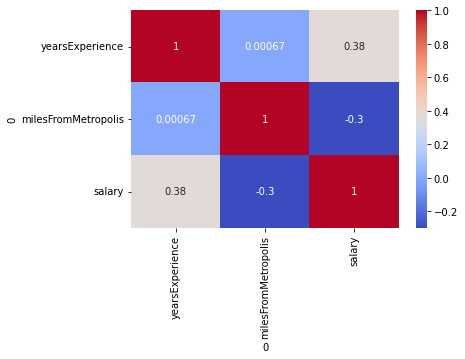

In [27]:
# Correlation metrix using seaborn
sns.heatmap(train[num_names].corr(), annot=True, cmap='coolwarm');

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [28]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
import scipy.stats as st

# creating function for performing chi-sqaure test on two column
def chi_square_test(col1, col2):

    print(f"Chi square test on {col1}   {col2}")
    #Contingency Table
    cont_table = pd.crosstab(train[col1], train[col2])
    stat, p, dof, expected = chi2_contingency(cont_table.values)
    critical = st.chi2.ppf(0.95, dof)
    
    
    #Observed Values
    obs_values = cont_table.values
    
    
    #Expected Values
    exp_values = expected
    
    
    #Degree of Freedom
    print("Degrees of freedom: ", dof)
    
    
    #Significance Level 5%
    print("Significance level: ",0.05)
    
    
    #chi-square statistic
    print("Chi square statistic: ", stat)
    
    
    #critical_value
    print("critical value: ", critical)
    
    
    
    #p-value
    print("P-value: ", p)


    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on chi_square_statistic and critical_value     
    if abs(stat) >= critical:
        print("Reject H0, there is a relationship between two categorical variables")
    else:
        print("Fail to reject H0, there is no relationship between two categorical variables")
        
    
    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on p_value and alpha
    if p <= 0.05:
        print("Reject H0, there is a relationship between two categorical variables")
    else:
        print("Fail to reject H0, there is no relationship between two categorical variables")
    print("-----------------------------------------------------------------------------------------")
        

In [29]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for i in cat_names:
    for j in cat_names:
        if i != j:
            chi_square_test(i,j)


Chi square test on jobType   degree
Degrees of freedom:  28
Significance level:  0.05
Chi square statistic:  158620.81447095104
critical value:  41.33713815142739
P-value:  0.0
Reject H0, there is a relationship between two categorical variables
Reject H0, there is a relationship between two categorical variables
-----------------------------------------------------------------------------------------
Chi square test on jobType   major
Degrees of freedom:  56
Significance level:  0.05
Chi square statistic:  125514.70618848808
critical value:  74.46832415930936
P-value:  0.0
Reject H0, there is a relationship between two categorical variables
Reject H0, there is a relationship between two categorical variables
-----------------------------------------------------------------------------------------
Chi square test on jobType   industry
Degrees of freedom:  42
Significance level:  0.05
Chi square statistic:  47.265180908558605
critical value:  58.12403768086803
P-value:  0.26625439162555

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


<Figure size 864x720 with 0 Axes>

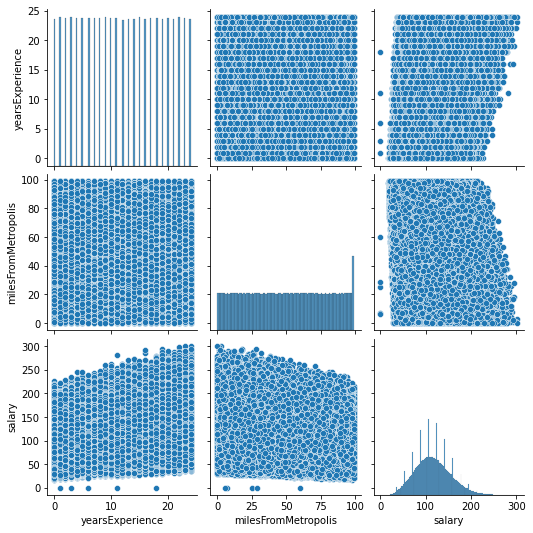

In [30]:
# plotting scatter plot

plt.figure(figsize=(12,10))
sns.pairplot(train[num_names])
plt.show()

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


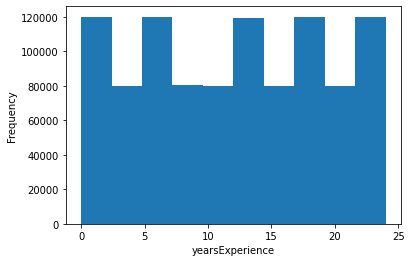

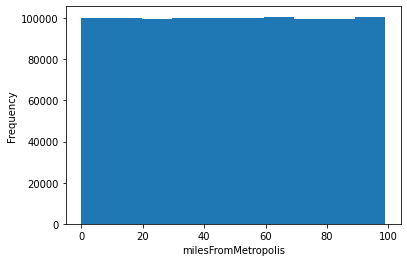

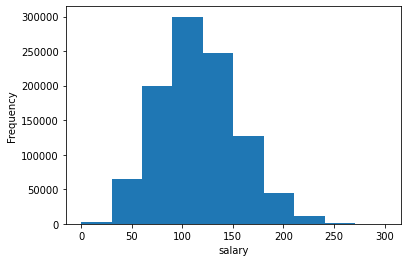

In [31]:
# Histogram using pandas 

plt.figure()
train[num_names[0]].plot.hist()
plt.xlabel(num_names[0])
plt.show()
train[num_names[1]].plot.hist()
plt.xlabel(num_names[1])
plt.show()
train[num_names[2]].plot.hist()
plt.xlabel(num_names[2])
plt.show()

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodal(it has only one peak in distribution) which is normal distributed


## groupby

You can use groupby to chunk up your data into subsets for further analysis.

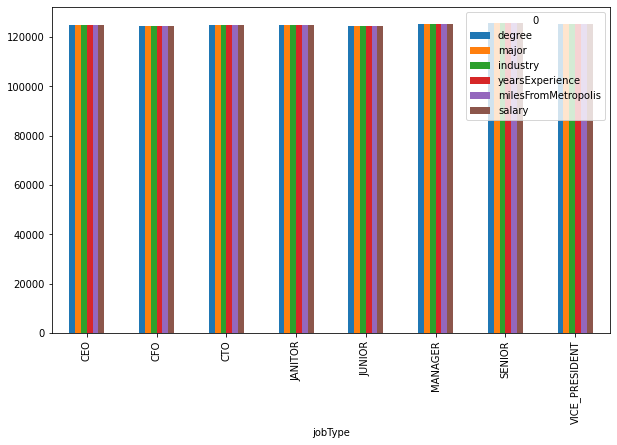

In [32]:
# goup data by jobType and plot count plot
train.groupby('jobType').count().plot(kind='bar',figsize=(10,6))
plt.show()

from above graph:
1. All data for each jobType is distributed equally.

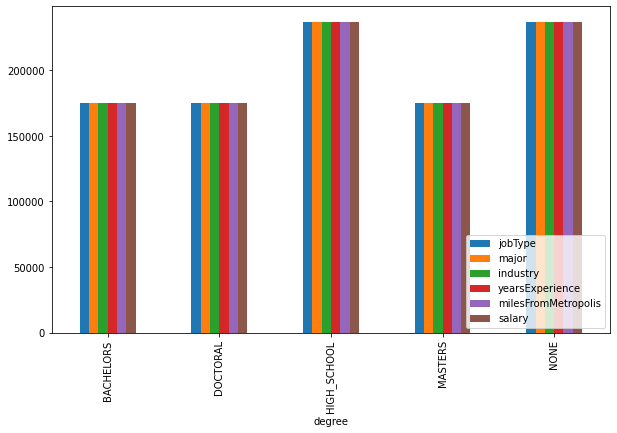

In [33]:
# goup data by degree and plot count plot
train.groupby('degree').count().plot(kind='bar',figsize=(10,6))
plt.legend(loc='lower right')
plt.show()

From above graph:

1. All data for BACHELORS, DOCTORAL, MASTERS are equally distributed.

2. All data for HIGH_SCHOOL, NONE are equally distributed.

3. Here the data distribution between group of BACHELORS, DOCTORAL, MASTERS is less than data distribution for group HIGH_SCHOOL, NONE

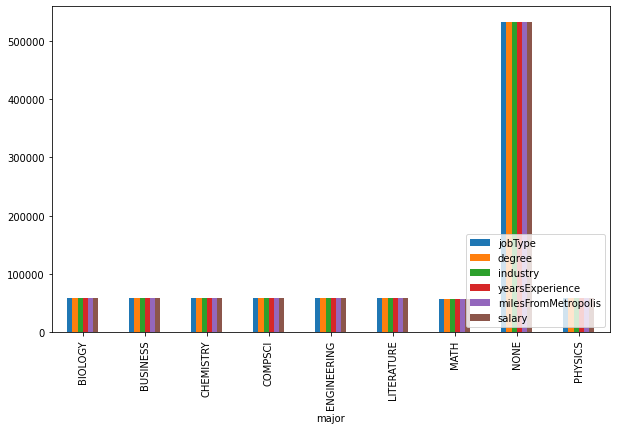

In [34]:
# goup data by major and plot count plot
train.groupby('major').count().plot(kind='bar',figsize=(10,6))
plt.legend(loc='lower right')
plt.show()

From above graph:

1. Except "NONE" all data for each major are equally distributed.

2. There is large distribution of data for major NONE as compared to other major's

3. From degree plot, we can see addition of None and High school categories are equal as None in major plot


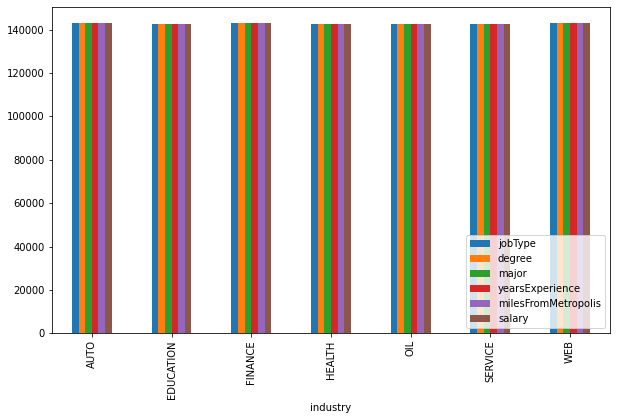

In [35]:
# goup data by industry and plot count plot
train.groupby('industry').count().plot(kind='bar',figsize=(10,6))
plt.legend(loc='lower right')
plt.show()

from above graph:
1. All data for each industry is distributed equally.

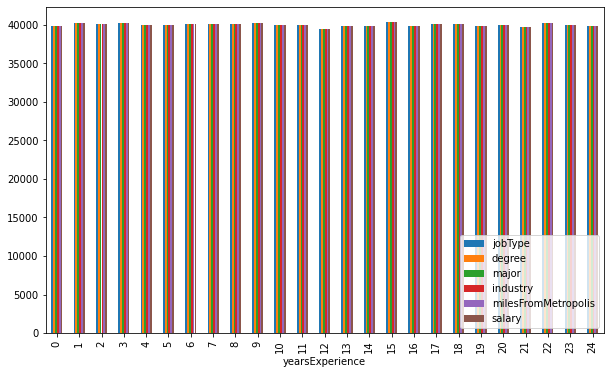

In [36]:
# goup data by yearsExperience and plot count plot
train.groupby('yearsExperience').count().plot(kind='bar',figsize=(10,6))
plt.legend(loc='lower right')
plt.show()

from above graph:
1. All data for each yearsExperience is distributed almost equally and years of experience ranges from 0 to 24.

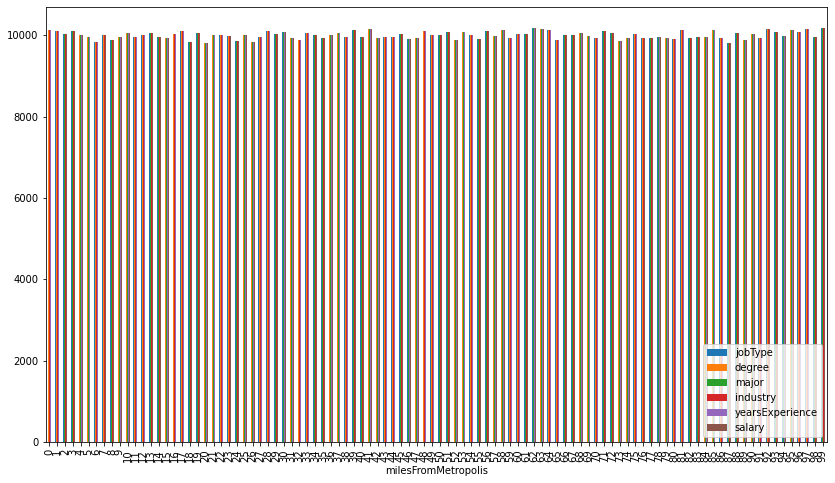

In [37]:
# goup data by milesFromMetropolis and plot count plot
train.groupby('milesFromMetropolis').count().plot(kind='bar',figsize=(14,8))
plt.legend(loc='lower right')
plt.show()

from above graph:
1. All data for each milesFromMetropolis is distributed almost equally.

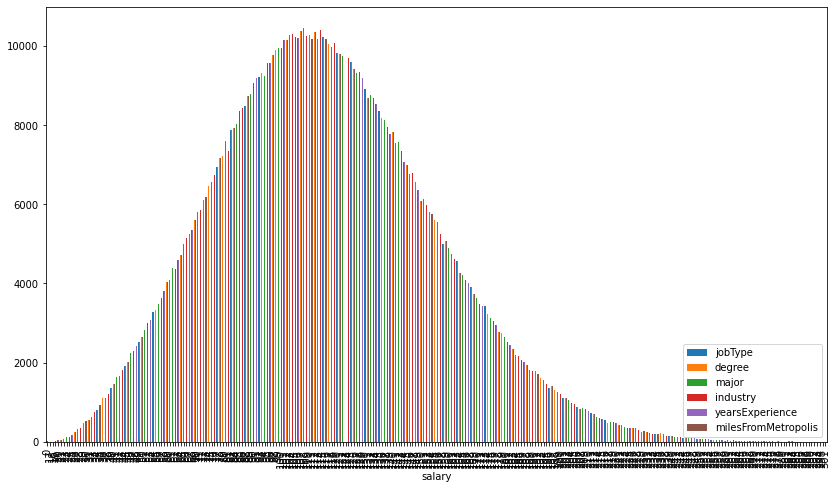

In [38]:
# goup data by salary and plot count plot
train.groupby('salary').count().plot(kind='bar',figsize=(14,8))
plt.legend(loc='lower right')
plt.show()

from above graph:
1. All data for each value of salary is distributed symmetrical and unimodel. SInce it is numerical data, it can be viewed best in histogram plot

## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers. (Q1 - 1.5*IQR)

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers. (Q3 + 1.5*IOR)

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


In [39]:
train['yearsExperience'].values

array([10,  3, 10, ..., 16,  6, 20])

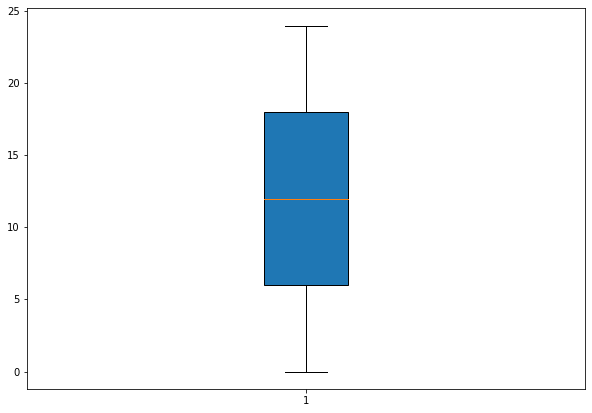

In [40]:
# box plot using pandas 
# box plot for yearsExperience column

plt.figure(figsize=(10,7))
plt.boxplot(x=train['yearsExperience'], patch_artist=True, meanline=True)
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

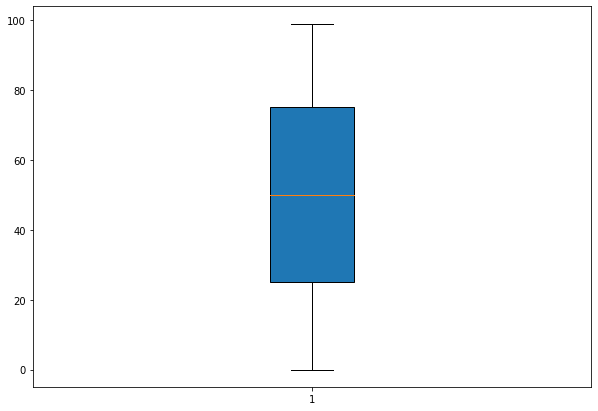

In [41]:
# box plot using pandas 
# box plot for milesFromMetropolies column

plt.figure(figsize=(10,7))
plt.boxplot(x=train['milesFromMetropolis'], patch_artist=True, meanline=True)
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

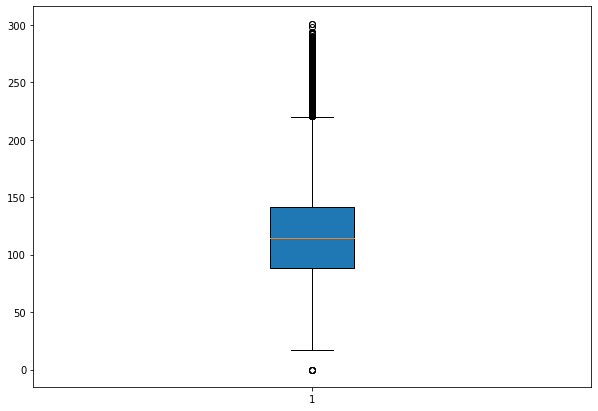

In [42]:
# box plot using pandas 
# box plot for salary column
plt.figure(figsize=(10,7))
plt.boxplot(x=train['salary'], patch_artist=True, meanline=True)
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120K
- There are outliers which are above 220K

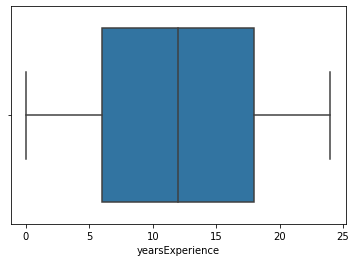

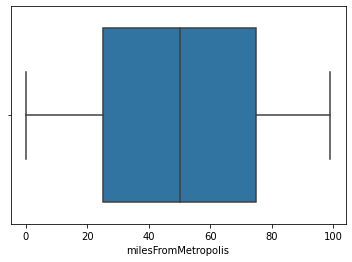

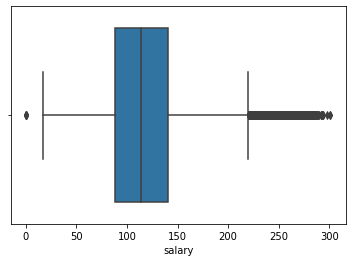

In [43]:
# box plot using seaborn 
# box plot for yearsExperience column
# box plot for mileFromMetropolis column
# box plot for salary column
sns.boxplot(x=train['yearsExperience'])
plt.show()
sns.boxplot(x=train['milesFromMetropolis'])
plt.show()
sns.boxplot(x=train['salary'])
plt.show()


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

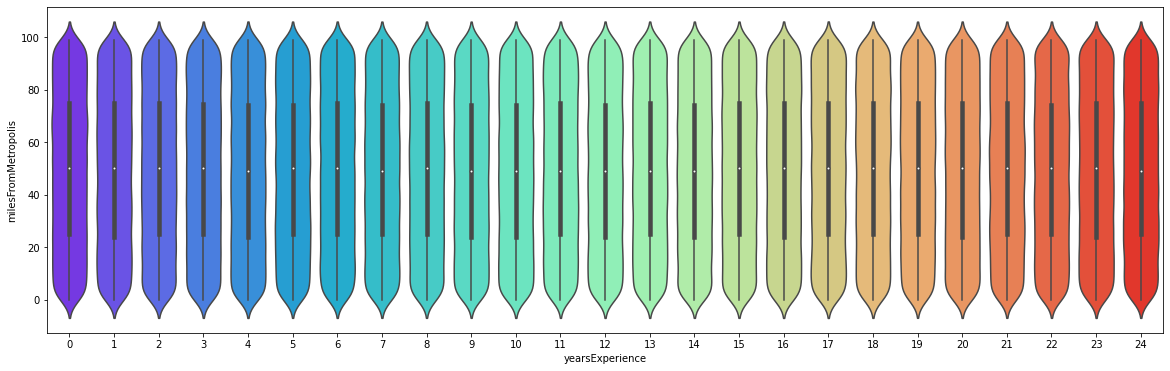

In [44]:
# violin plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='milesFromMetropolis', data=train, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

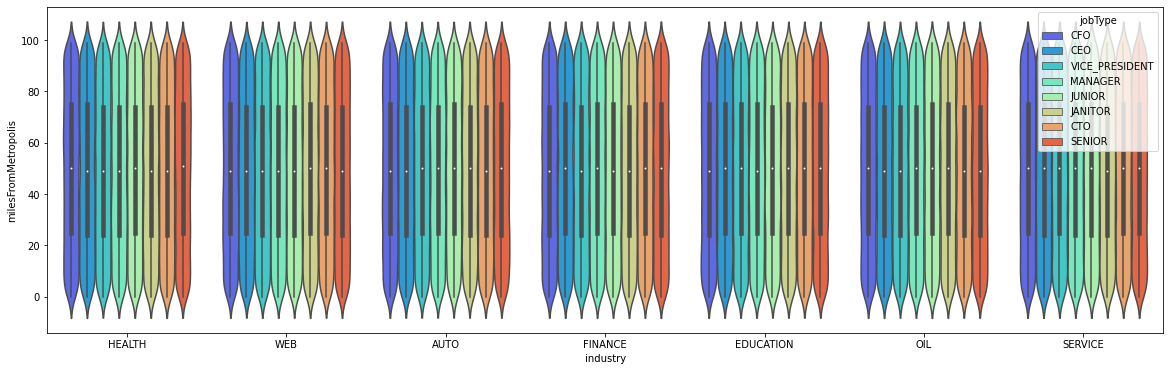

In [45]:
# how to use hue parameter in the plot
plt.figure(figsize=(20,6))
sns.violinplot(x='industry', y='milesFromMetropolis', hue='jobType', data=train, palette='rainbow')

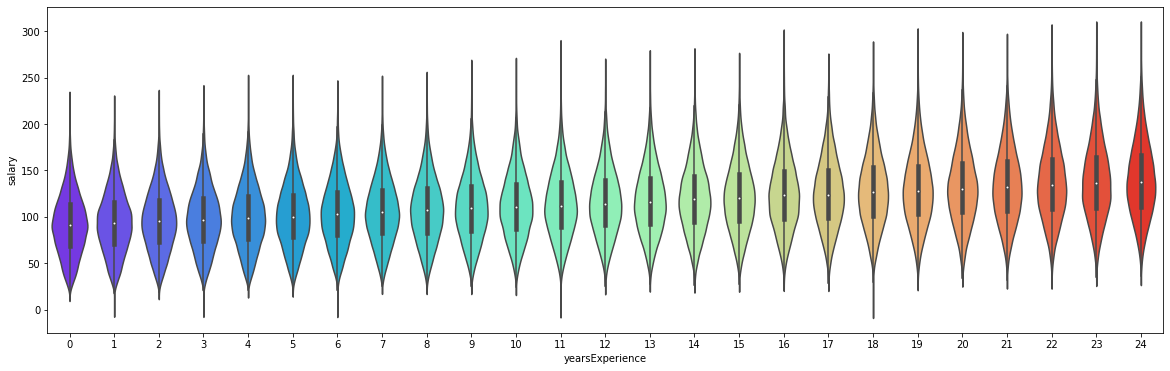

In [46]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='salary', data=train, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

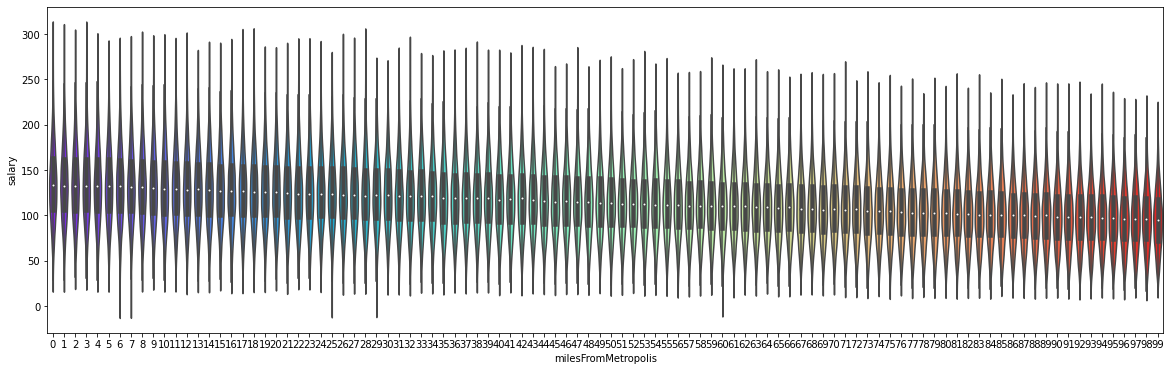

In [47]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis', y='salary', data=train, palette='rainbow')


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.

To know more on boxen plot - https://towardsdatascience.com/letter-value-plot-the-easy-to-understand-boxplot-for-large-datasets-12d6c1279c97

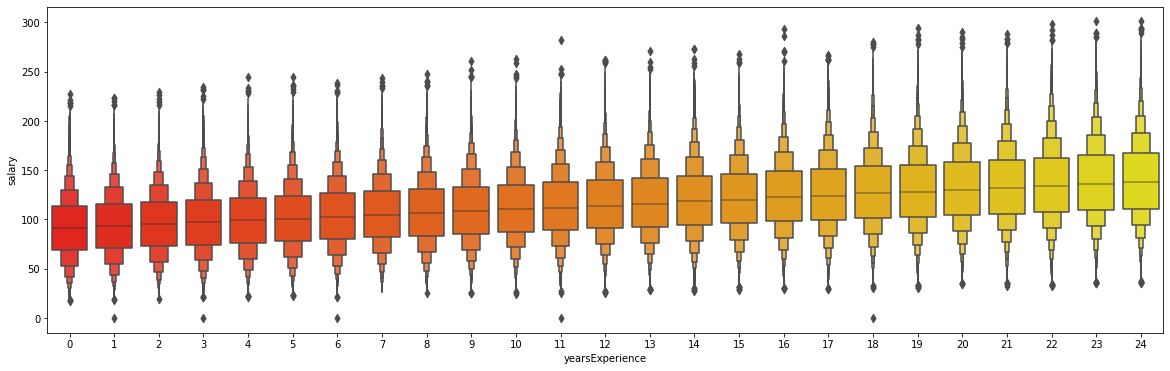

In [48]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience', y='salary', data=train, palette='autumn');

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

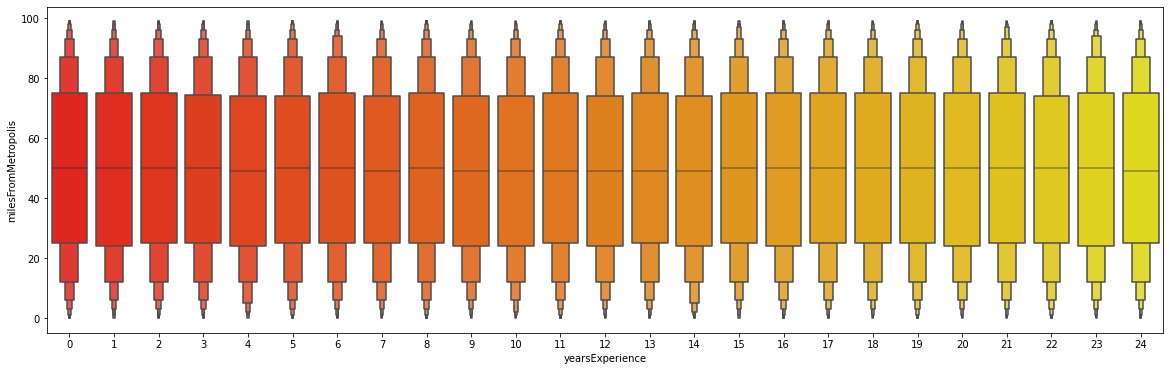

In [49]:
# boxen plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience', y='milesFromMetropolis', data=train, palette='autumn');

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

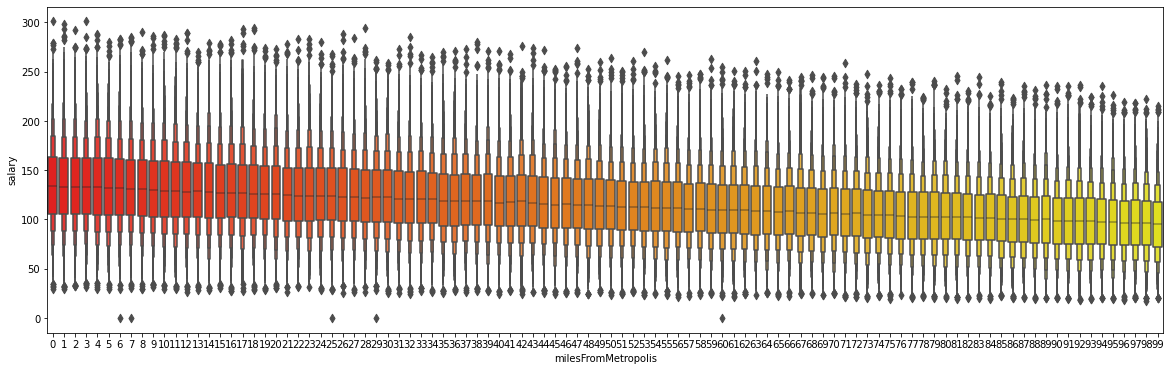

In [50]:
# boxen plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='milesFromMetropolis', y='salary', data=train, palette='autumn');

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Point Plot


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

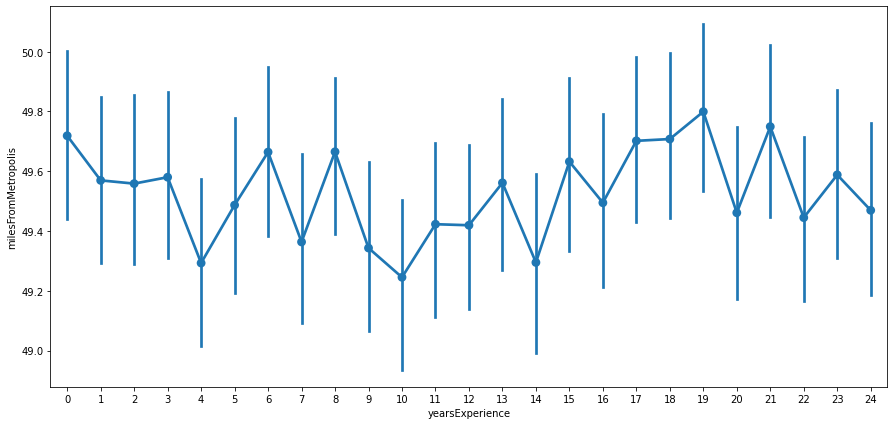

In [51]:
# point plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(15,7))
sns.pointplot(x='yearsExperience', y='milesFromMetropolis', data=train);

From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the milesFromMetropolis has dispersion of vales for each yearsExperience value

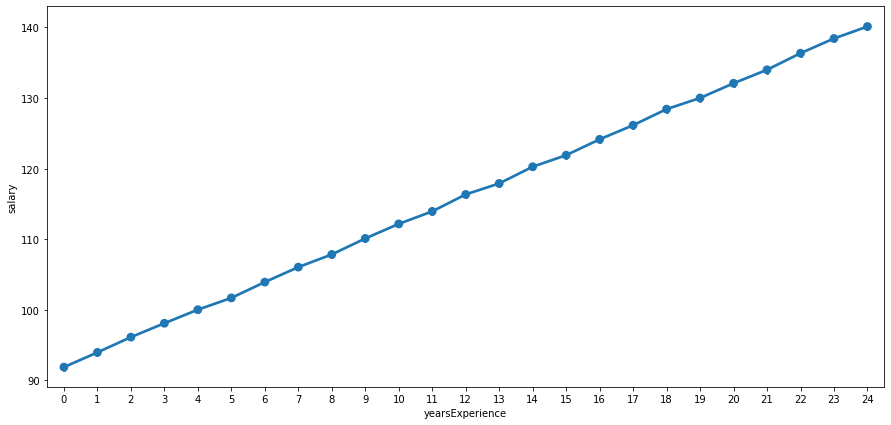

In [52]:
# point plot for yearsExperience and salary columns
plt.figure(figsize=(15,7))
sns.pointplot(x='yearsExperience', y='salary', data=train);

From above point plot

There is a increase in salary when there is a increase in yearsExperience

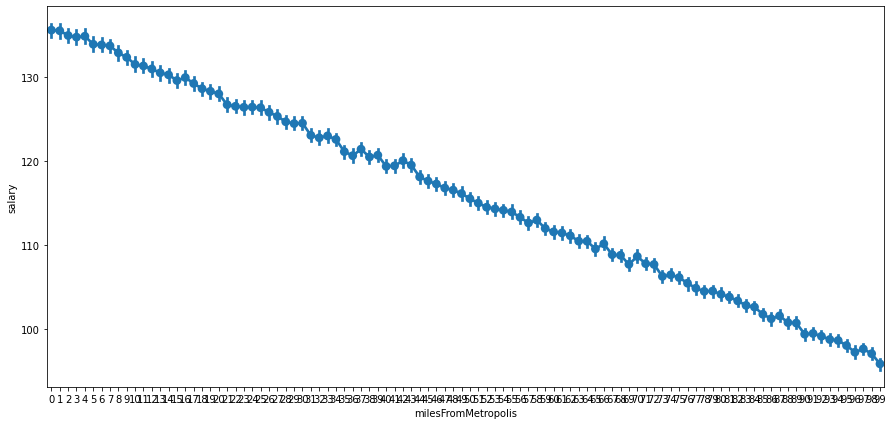

In [53]:
# point plot for milesFromMetropolis from salary columns
plt.figure(figsize=(15,7))
sns.pointplot(x='milesFromMetropolis', y='salary', data=train);

From above point plot

There is a decrease in salary when there is a decrease in yearsExperience

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


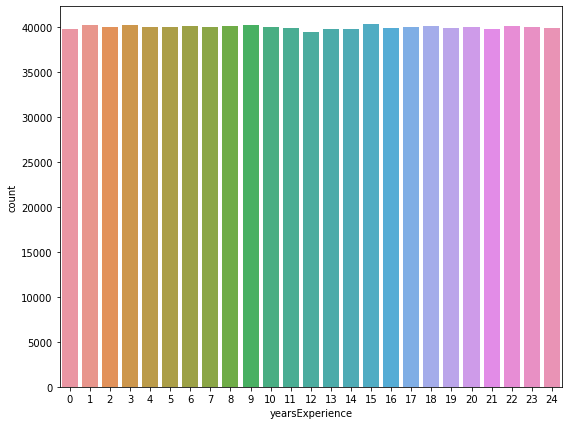

In [54]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(9,7))
sns.countplot(x=train['yearsExperience'])
plt.show()

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

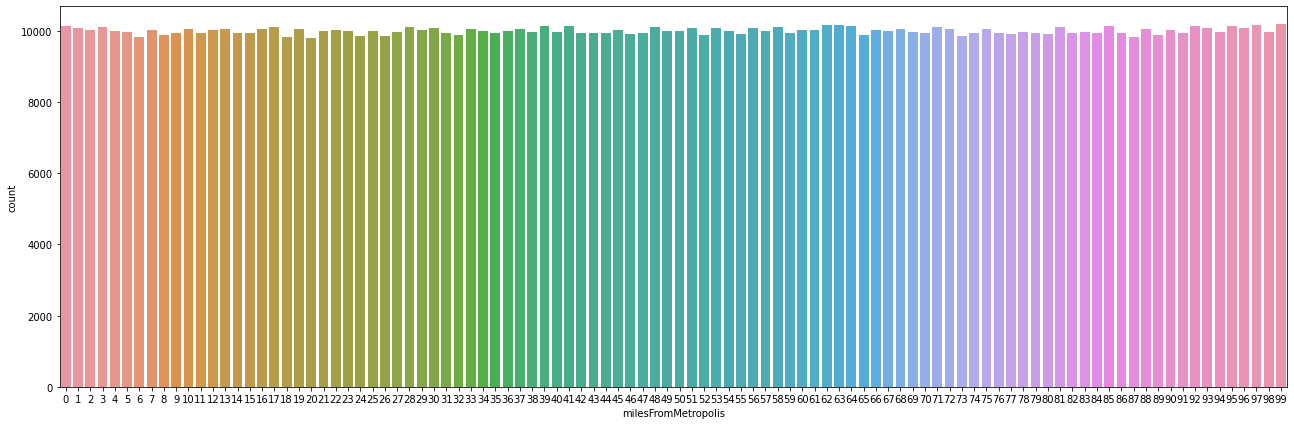

In [55]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(22,7))
sns.countplot(x=train['milesFromMetropolis'])
plt.show()

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

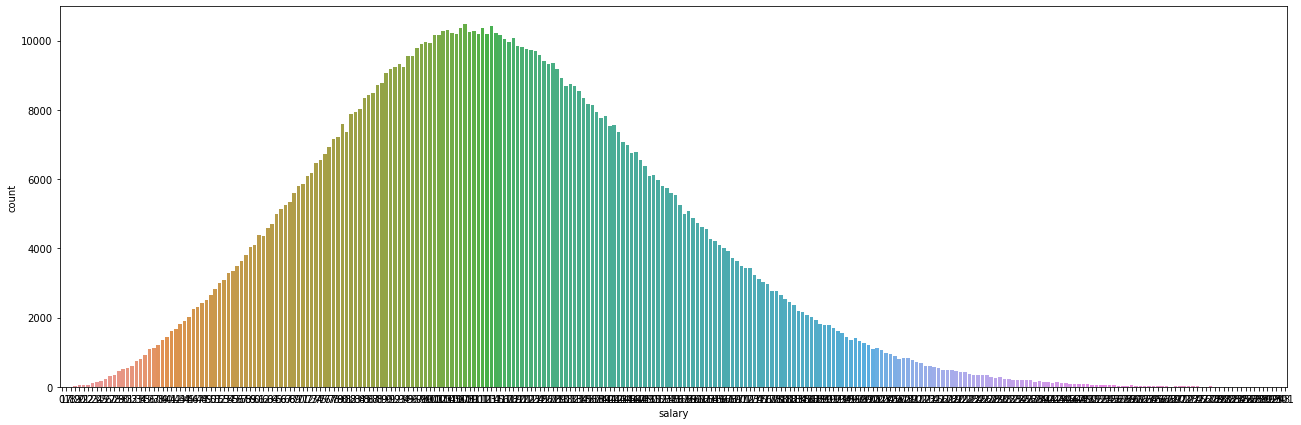

In [56]:
# count plot of whole datset based on salary
plt.figure(figsize=(22,7))
sns.countplot(x=train['salary'])
plt.show()

From above count plot

distribution of values of yearExperience is symmetrical, unimodal.

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

In [57]:
train_sample = train[:50000]
len(train_sample)

50000

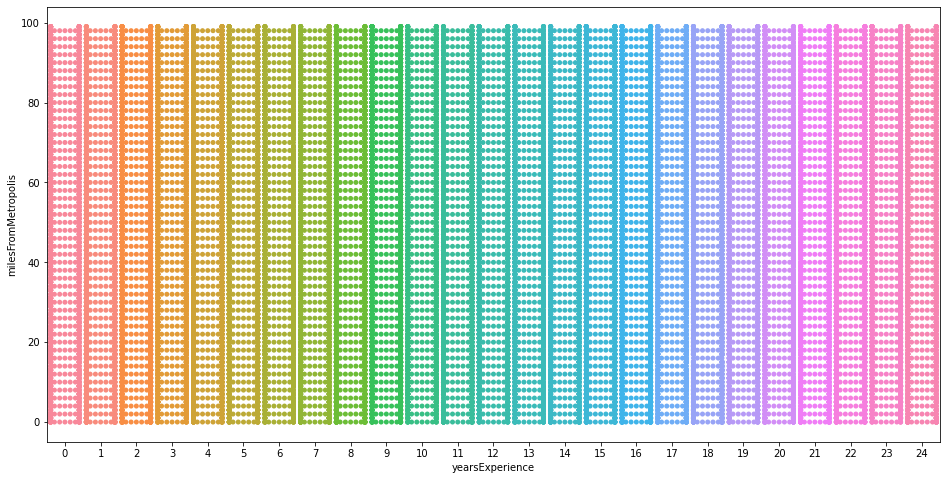

In [58]:
# swarm plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(16,8))
sns.swarmplot(x='yearsExperience', y='milesFromMetropolis', data=train_sample)
plt.show()

From above swarm plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

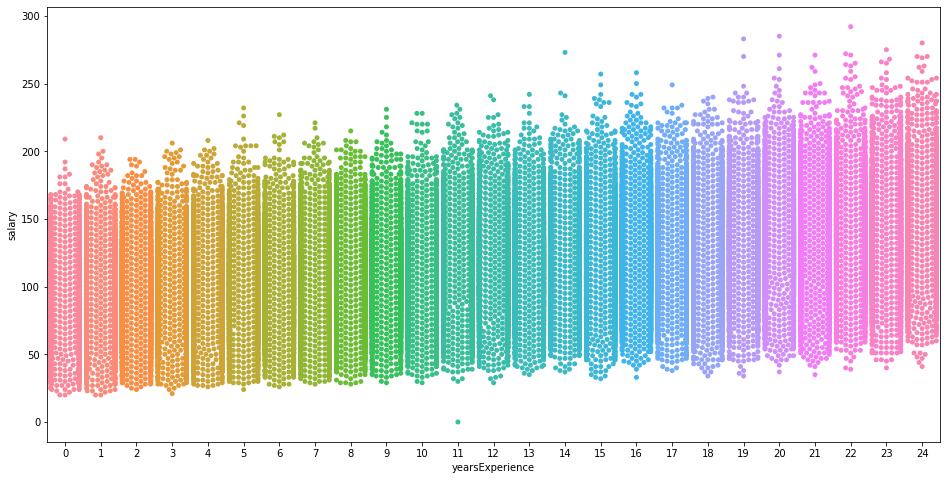

In [59]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(16,8))
sns.swarmplot(x='yearsExperience', y='salary', data=train_sample)
plt.show()

from above swarm plot:

1. For each years of experience, we could see the trend of the salary package

2. As experience increases, salary also increases

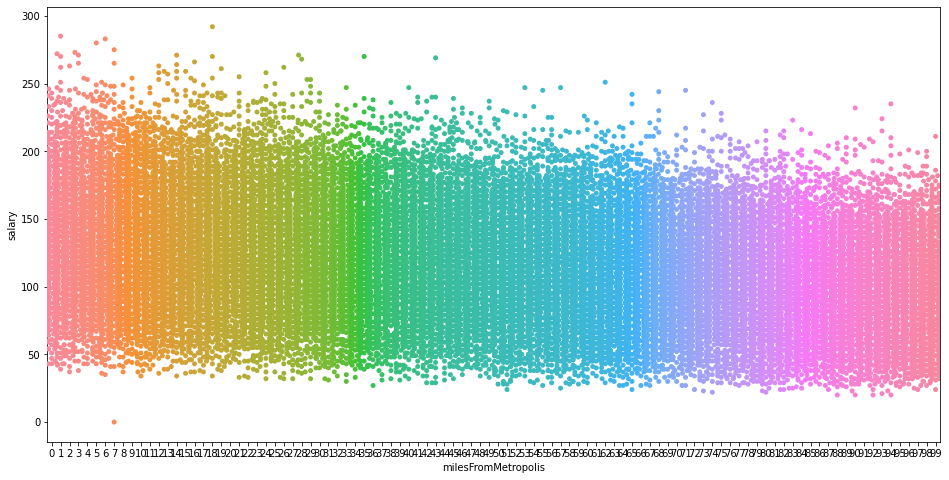

In [60]:
# swarm plot for milesFromMetropolis and salary columns

plt.figure(figsize=(16,8))
sns.swarmplot(x='milesFromMetropolis', y='salary', data=train_sample)
plt.show()

from above swarm plot:

1. For each mile from Metro's, we could see the range of the salary package

2. As miles increases, there is slight decrease trend in salaries which we have seen in correlation

## Combine plot

Combination of boxenplot and swarm plot

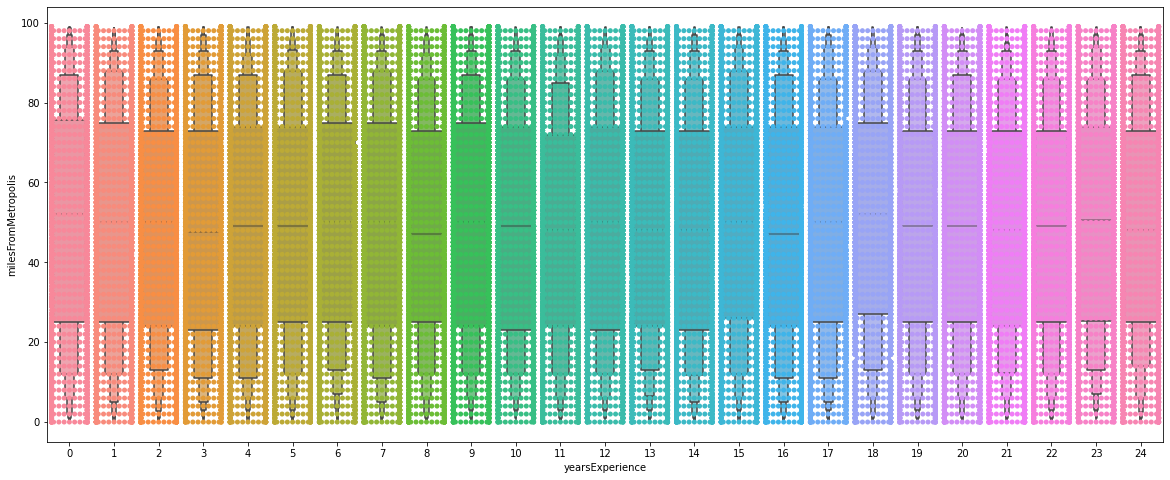

In [61]:
# combine boxen and swarm plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,8))
sns.swarmplot(x='yearsExperience', y='milesFromMetropolis', data=train_sample)
sns.boxenplot(x='yearsExperience', y='milesFromMetropolis', data=train_sample)
plt.show()

From above combine plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

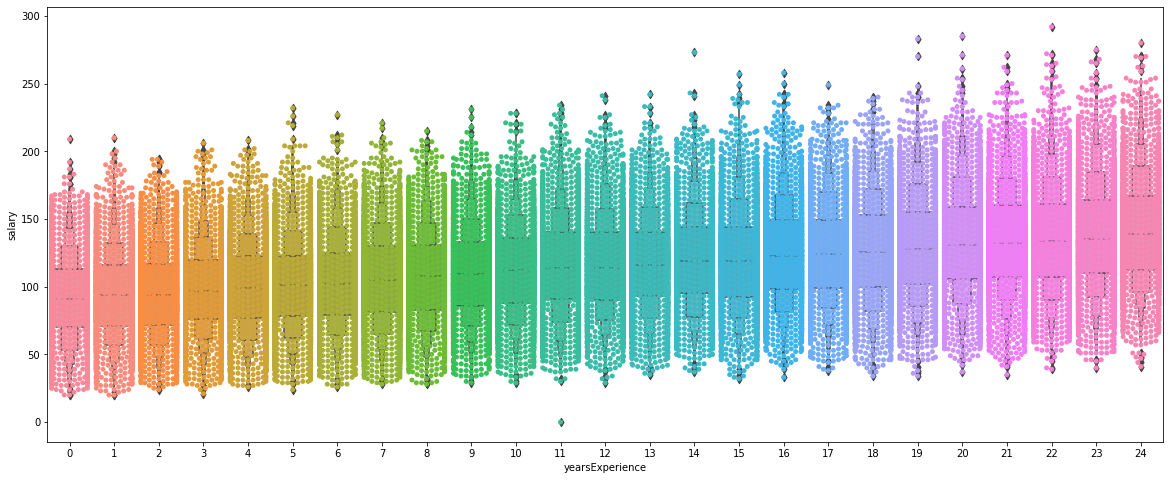

In [62]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,8))
sns.swarmplot(x='yearsExperience', y='salary', data=train_sample)
sns.boxenplot(x='yearsExperience', y='salary', data=train_sample)
plt.show()

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

4. outliers of both plots are likewise

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Vertical axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

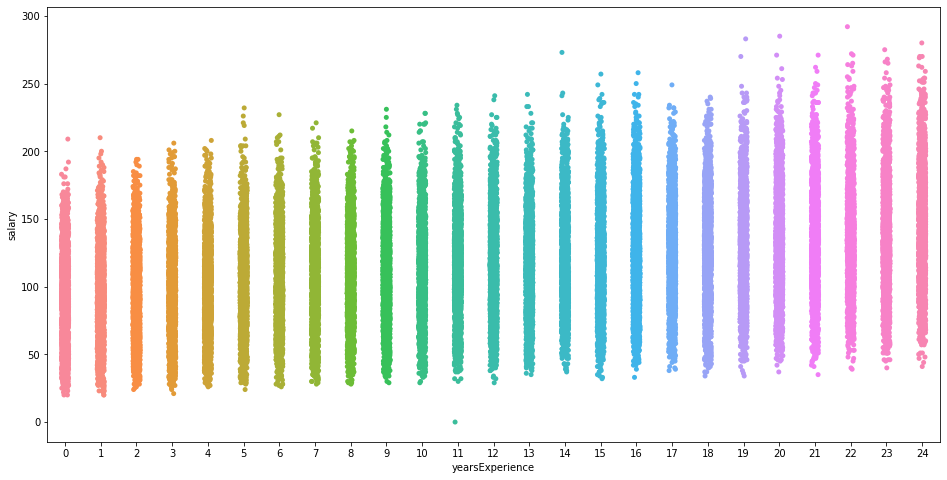

In [63]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(16,8))
sns.stripplot(x='yearsExperience', y='salary', data=train_sample)
plt.show()

from above strip plot:

Distribution of salary values increase when there is increase in years of experience

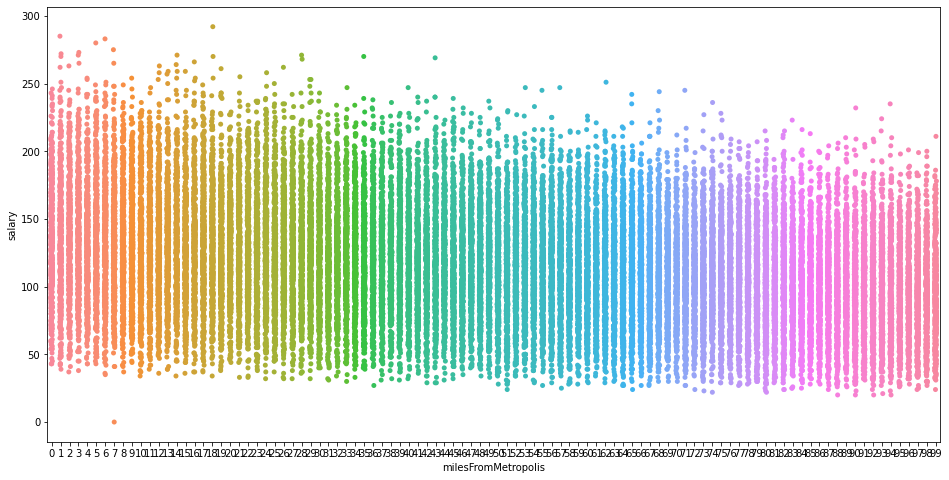

In [64]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(16,8))
sns.stripplot(x='milesFromMetropolis', y='salary', data=train_sample)
plt.show()

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [65]:
# import statsmodle library for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor
    

In [66]:
train.columns

Index(['jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis', 'salary'],
      dtype='object', name=0)

In [67]:
# creating a dataframe of just numerical values from train_dataset
train_vif = train.drop(['jobType', 'degree', 'major', 'industry','salary'], axis=1)

# target values from train_dataset
target = train['salary']

# numerical values column names
names = ['yearsExperience','milesFromMetropolis']

In [68]:
train_vif.columns 

Index(['yearsExperience', 'milesFromMetropolis'], dtype='object', name=0)

In [69]:
# loop for calculating VIF for each feature.
for i in range(len(names)):  

  # taking one column as target variable
    y = train_vif.loc[:,train_vif.columns == names[i]]
  
  # taking all other remaining columns as fetaure variable
    x = train_vif.loc[:,train_vif.columns != names[i]]
  
  # Instantiating the statsmodel
    import statsmodels.api as sm
    lm = sm.OLS(y,x)

  # fitting the OLS model on y and x
    result = lm.fit()
  
  # geting the r^2 value of results.
    r2 = result.rsquared
  
  # calculating vif value
    vif = round(1/(1-r2),2)
    print(f"R Square value of {num_names[i]} columns is {r2} keeping all other columns as features")
    print(f"Variance inflation Factor of {num_names[i]} columns is {vif}")
    print("\n")
  
  

R Square value of yearsExperience columns is 0.5483256412061355 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.21


R Square value of milesFromMetropolis columns is 0.5483256412061397 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.21




In [70]:
# anothet way of using VIF 

vif_df = pd.DataFrame()
vif_df['features'] = train_vif.columns
vif_df['VIF'] = [variance_inflation_factor(train_vif.values, i) for i in range(len(train_vif.columns))]
print(vif_df)

              features       VIF
0      yearsExperience  2.213984
1  milesFromMetropolis  2.213984


Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with each other.

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

In [71]:
# function to perform anova test between two variables.
def annova_test(col1, col2):

  # creating dataframe of two variables of interest
    train_anova = train[[col1, col2]]
  
  # gouping the data with first var in new dataframe
    group = train_anova.groupby(col1).count().reset_index()

  # print grouped data
    print(group)

  # getting list of unique values from new dataframe for first variable(becoz it is categorical var)
    unique_val = train_anova[col1].unique()

  # looping through each value present in list of unique values to plot probplot
    for major in unique_val:
        st.probplot(train_anova[train_anova[col1] == major][col2], dist='norm',plot=plt)
        plt.title(f'Probability plot: {major}')
        plt.show()


  # calculate ratio of the largest to the smallest sample standard deviation
    ratio = train_anova.groupby(col1).std().max() / train_anova.groupby(col1).std().min()
    print(ratio)

  # Create ANOVA backbone table with empty string value, columns names -> 'Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'
    data = [['between groups','','','','','',''], ['within groups','','','','','',''], ['Total','','','','','','']]
    anova_table = pd.DataFrame(data, columns=['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])
    anova_table.set_index('Source of Variation', inplace=True)
    
  # calculate SSTR and update anova table, with Source of variation = 'Between Groups'
    x_bar = train_anova[col2].mean()
    SSTR = train_anova.groupby(col1).count() * ((train_anova.groupby(col1).mean() - x_bar)**2)
    anova_table['SS']['between groups'] = SSTR[col2].sum()
    

  # calculate SSE and update anova table, with Source of variation = 'Within Groups'
    SSE = (train_anova.groupby(col1).count() - 1) * train_anova.groupby(col1).std()**2
    anova_table['SS']['within groups'] = SSE[col2].sum()

  # calculate SSTR and update anova table, with Source of variation = 'Total'
    SSTR = SSTR[col2].sum() + SSE[col2].sum()
    anova_table['SS']['Total'] = SSTR

  # update degree of freedom, for each groups 'Between Groups', 'Within Groups', 'Total'
    anova_table['df']['between groups'] = train_anova[col1].nunique() - 1
    anova_table['df']['within groups'] = train_anova.shape[0] - train_anova[col1].nunique()
    anova_table['df']['Total'] = train_anova.shape[0] - 1 

  # calculate MS
    anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F 
    F = anova_table['MS']['between groups'] / anova_table['MS']['within groups']
    anova_table['F']['between groups'] = F

  # p-value
    anova_table['P-value']['between groups'] = 1 - st.f.cdf(F, anova_table['df']['between groups'],anova_table['df']['within groups'])
  

  # F critical 
    alpha = 0.05
  # possible hypothesis types "right-tailed, left-tailed, two-tailed" , choose one type and calculate F critcial and add to backbone dataframe
    tail_hypothesis_type = 'two_tailed'
    if tail_hypothesis_type == 'two_tailed':
        alpha /= 2
    anova_table['F crit']['between groups'] = st.f.ppf(1-alpha,anova_table['df']['between groups'],anova_table['df']['within groups']) 
  
  # Final ANOVA Table
    print(anova_table)


  # The p-value approach
    if anova_table['P-value']['between groups'] <= alpha:
        print('Null hypotheses is rejected')
    else:
        print("Failed to reject null hypothesis")
  
      
  # The critical value approach
    if anova_table['F']['between groups'] > anova_table['F crit']['between groups']:
        print('Null hypotheses is rejected')
    else:
        print("Failed to reject null hypothesis")
        
  

0        major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58596
5   LITERATURE   58684
6         MATH   57801
7         NONE  532355
8      PHYSICS   58410


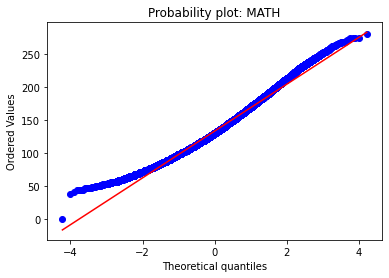

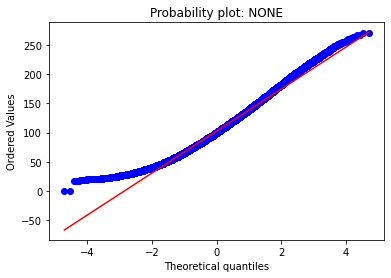

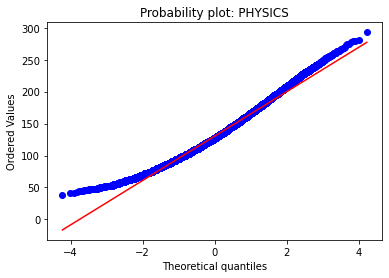

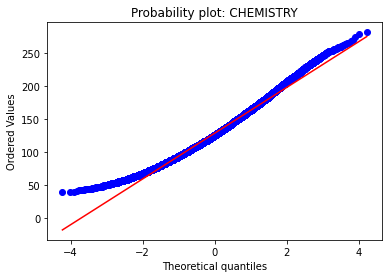

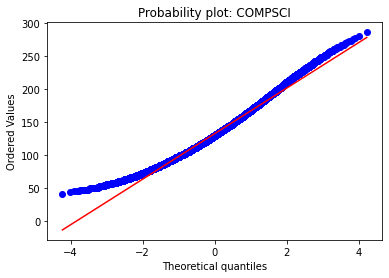

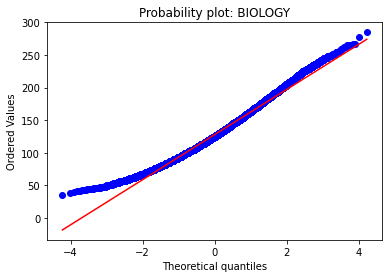

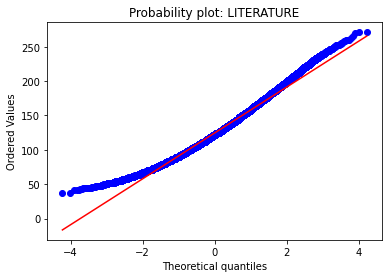

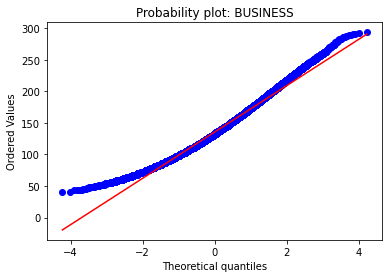

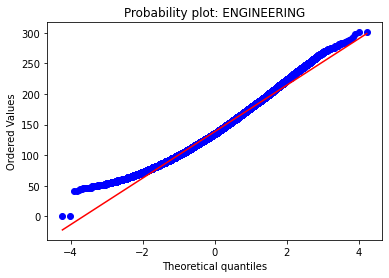

0
salary    1.137312
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
between groups        214940060.760225       8  26867507.595028  20922.428835   
within groups        1284137037.774666  999991      1284.148595                 
Total                1499077098.534891  999999      1499.078598                 

                    P-value    F crit  
Source of Variation                    
between groups          0.0  2.191831  
within groups                          
Total                                  
Null hypotheses is rejected
Null hypotheses is rejected


In [72]:
# perform anova test on major and salary
annova_test('major','salary')

0         jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125046
3         JANITOR  124971
4          JUNIOR  124594
5         MANAGER  125121
6          SENIOR  125886
7  VICE_PRESIDENT  125235


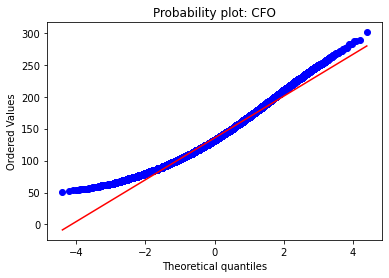

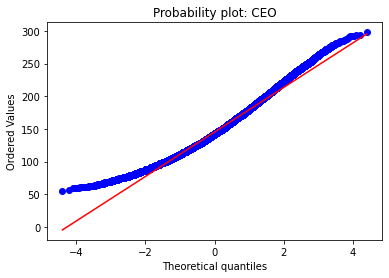

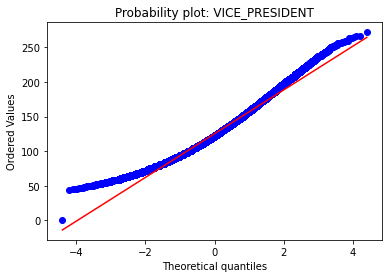

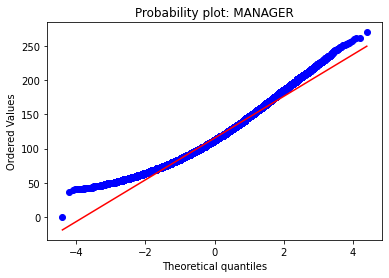

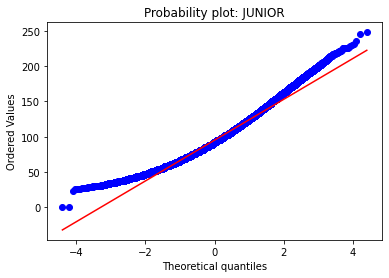

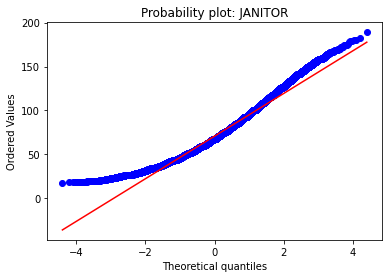

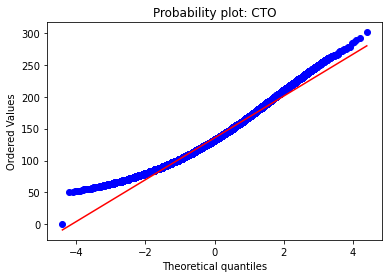

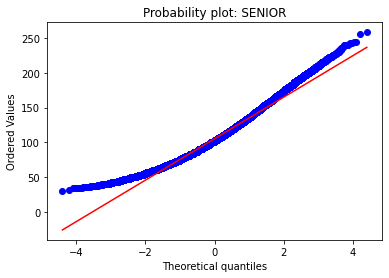

0
salary    1.3969
dtype: float64
                                    SS      df              MS             F  \
Source of Variation                                                            
between groups        535091060.072659       7  76441580.01038  79296.758903   
within groups         963986038.462213  999992       963.99375                 
Total                1499077098.534871  999999     1499.078598                 

                    P-value   F crit  
Source of Variation                   
between groups          0.0  2.28755  
within groups                         
Total                                 
Null hypotheses is rejected
Null hypotheses is rejected


In [73]:
# perform anova test on jobType and salary
annova_test('jobType', 'salary')

0       degree  salary
0    BACHELORS  175495
1     DOCTORAL  175364
2  HIGH_SCHOOL  236976
3      MASTERS  175311
4         NONE  236854


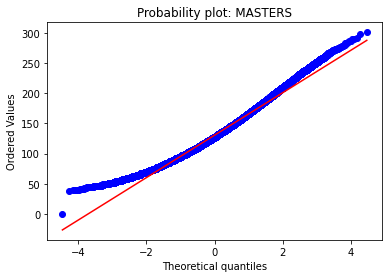

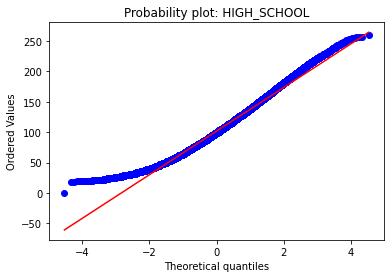

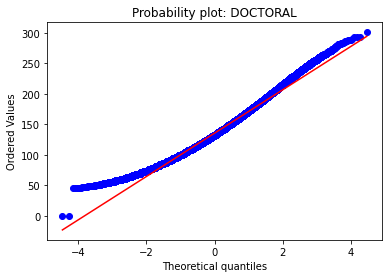

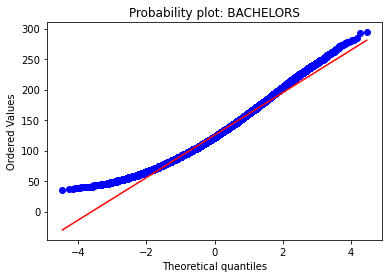

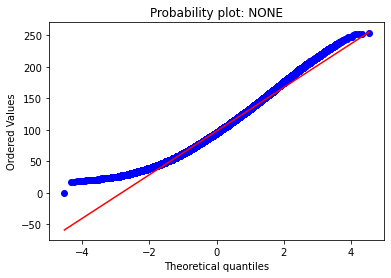

0
salary    1.034299
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
between groups        241396422.297586       4  60349105.574396  47984.202166   
within groups        1257680676.237301  999995      1257.686965                 
Total                1499077098.534887  999999      1499.078598                 

                    P-value    F crit  
Source of Variation                    
between groups          0.0  2.785834  
within groups                          
Total                                  
Null hypotheses is rejected
Null hypotheses is rejected


In [74]:
# perform anova test on degree and salary
annova_test('degree', 'salary')

0   industry  salary
0       AUTO  142943
1  EDUCATION  142819
2    FINANCE  142867
3     HEALTH  142755
4        OIL  142771
5    SERVICE  142639
6        WEB  143206


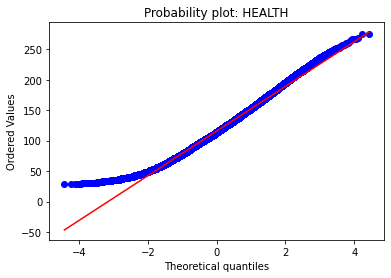

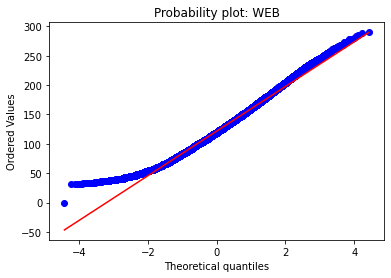

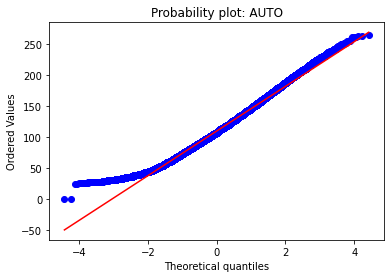

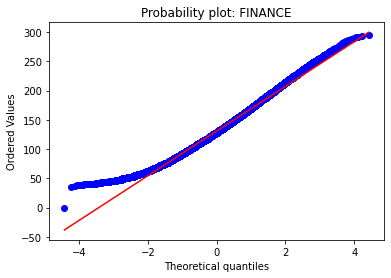

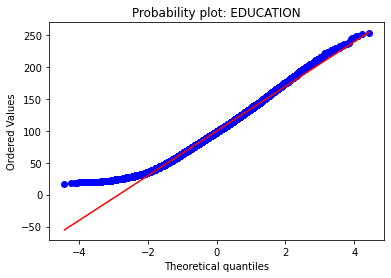

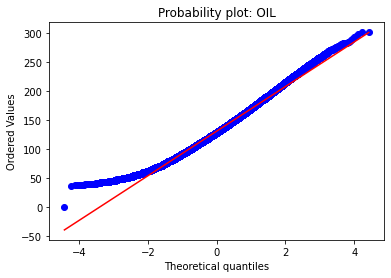

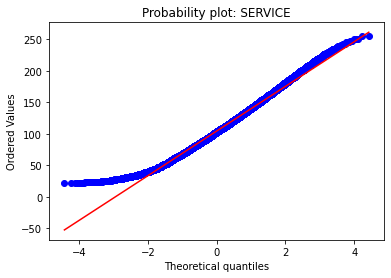

0
salary    1.0974
dtype: float64
                                    SS      df              MS             F  \
Source of Variation                                                            
between groups        131887990.448761       6  21981331.74146  16077.642619   
within groups        1367189108.086116  999993     1367.198678                 
Total                1499077098.534877  999999     1499.078598                 

                    P-value    F crit  
Source of Variation                    
between groups          0.0  2.408242  
within groups                          
Total                                  
Null hypotheses is rejected
Null hypotheses is rejected


In [75]:
# perform anova test on industry and salary
annova_test('industry', 'salary')

0         jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125046
3         JANITOR           124971
4          JUNIOR           124594
5         MANAGER           125121
6          SENIOR           125886
7  VICE_PRESIDENT           125235


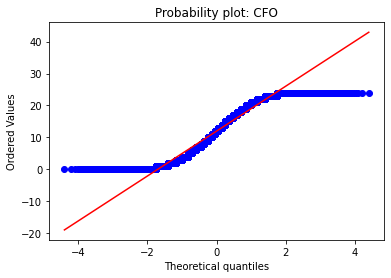

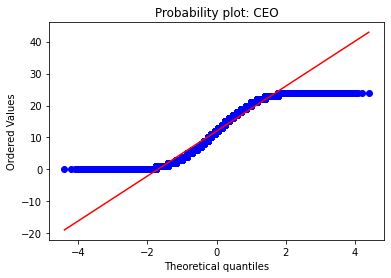

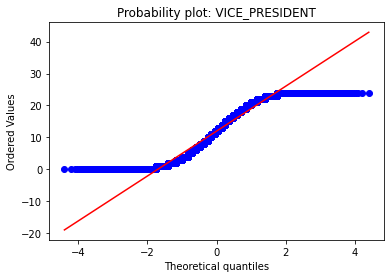

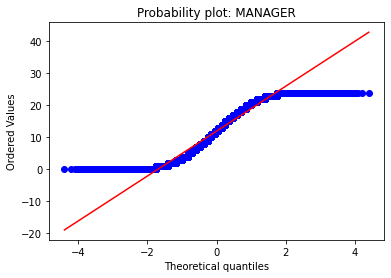

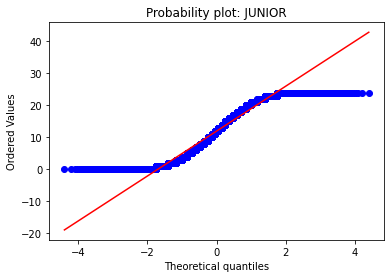

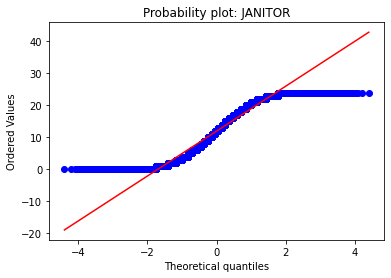

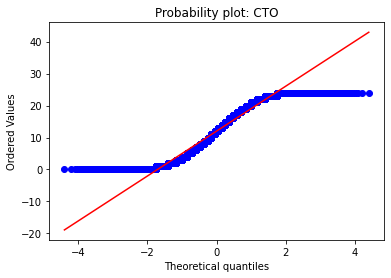

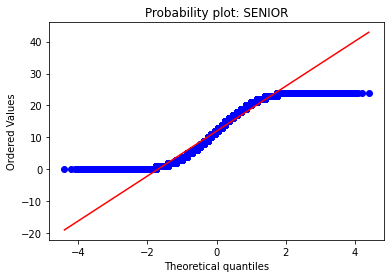

0
yearsExperience    1.002522
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
between groups            117.457034       7  16.779576  0.322567  0.944194   
within groups        52018412.569971  999992  52.018829                       
Total                52018530.027004  999999  52.018582                       

                      F crit  
Source of Variation           
between groups       2.28755  
within groups                 
Total                         
Failed to reject null hypothesis
Failed to reject null hypothesis


In [76]:
# perform anova test on jobType and yearsExperience
annova_test('jobType','yearsExperience')

0   industry  yearsExperience
0       AUTO           142943
1  EDUCATION           142819
2    FINANCE           142867
3     HEALTH           142755
4        OIL           142771
5    SERVICE           142639
6        WEB           143206


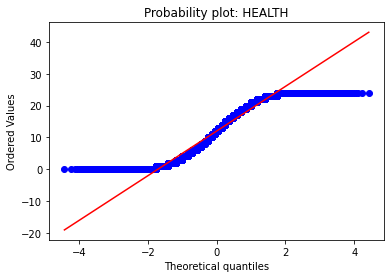

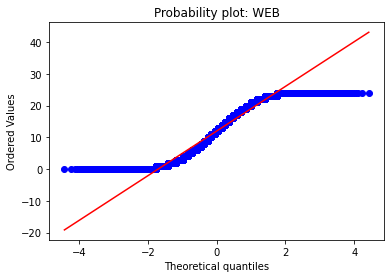

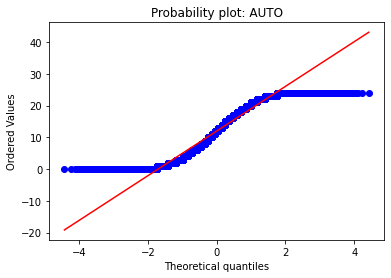

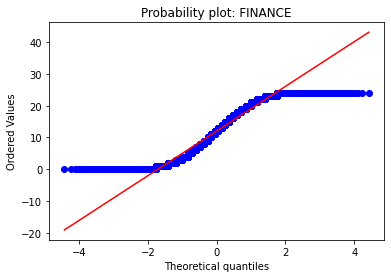

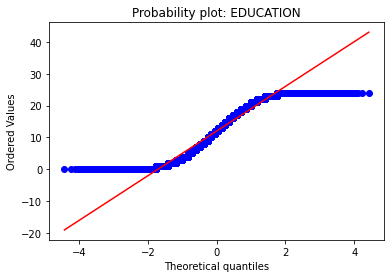

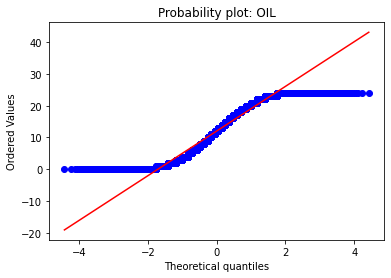

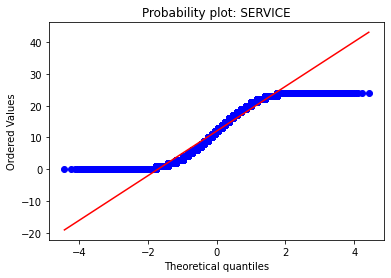

0
yearsExperience    1.002384
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
between groups            182.340098       6  30.390016  0.584213  0.743267   
within groups        52018347.686906  999993  52.018712                       
Total                52018530.027004  999999  52.018582                       

                       F crit  
Source of Variation            
between groups       2.408242  
within groups                  
Total                          
Failed to reject null hypothesis
Failed to reject null hypothesis


In [77]:
# perform anova test on industry and yearsExperience
annova_test('industry', 'yearsExperience')

> From anova test, we can infer that all the groups doesn't equal variances and each group has no significant effect on each other

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [78]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scaling_features(df,cols):
    scaler = MinMaxScaler()
    df[cols] = scaler.fit_transform(train[cols])
    return df


In [79]:
# Making a list of the column names to be scaled 

# passing data and column name for scaling
train_scaled = scaling_features(train, num_names)
print(train_scaled)


0              jobType       degree      major   industry  yearsExperience  \
0                  CFO      MASTERS       MATH     HEALTH         0.416667   
1                  CEO  HIGH_SCHOOL       NONE        WEB         0.125000   
2       VICE_PRESIDENT     DOCTORAL    PHYSICS     HEALTH         0.416667   
3              MANAGER     DOCTORAL  CHEMISTRY       AUTO         0.333333   
4       VICE_PRESIDENT    BACHELORS    PHYSICS    FINANCE         0.333333   
...                ...          ...        ...        ...              ...   
999995  VICE_PRESIDENT    BACHELORS  CHEMISTRY     HEALTH         0.791667   
999996             CTO  HIGH_SCHOOL       NONE    FINANCE         0.500000   
999997          JUNIOR  HIGH_SCHOOL       NONE  EDUCATION         0.666667   
999998             CFO      MASTERS       NONE     HEALTH         0.250000   
999999          JUNIOR    BACHELORS       NONE  EDUCATION         0.833333   

0       milesFromMetropolis    salary  
0                  0.83

# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [80]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder


# class for containing all functionality required for OneHotEncoding
class OneHotEncoding(OneHotEncoder):
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs) # calls the OneHotEncoder
        self.fit_flag = False
        
    # helper function to fit data  
    def fit(self, X, **kwargs):
        enc = super().fit(X)
        self.fit_flag = True
        return enc
    
    # helper function to transform data  
    def transform(self, X):
        sparse_matrix = super().transform(X)
        col_names = self.get_column_names(X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=col_names, index=X.index)
        return d_out
        

    # helper function to fit and transform data 
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    
    # helper function to get new column names after fitting and tranforming data 
    def get_column_names(self, X):
        new_cols = []
        for i, col in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_cols.append(f'{col}{self.categories_[i][j]}')
                j +=1           
        return new_cols 
        
    

In [81]:
# Split the features and the target
features = train_scaled.drop(['salary','yearsExperience','milesFromMetropolis'], axis=1)
target = train_scaled.loc[:,'salary']

In [82]:
# Features
print(features)

0              jobType       degree      major   industry
0                  CFO      MASTERS       MATH     HEALTH
1                  CEO  HIGH_SCHOOL       NONE        WEB
2       VICE_PRESIDENT     DOCTORAL    PHYSICS     HEALTH
3              MANAGER     DOCTORAL  CHEMISTRY       AUTO
4       VICE_PRESIDENT    BACHELORS    PHYSICS    FINANCE
...                ...          ...        ...        ...
999995  VICE_PRESIDENT    BACHELORS  CHEMISTRY     HEALTH
999996             CTO  HIGH_SCHOOL       NONE    FINANCE
999997          JUNIOR  HIGH_SCHOOL       NONE  EDUCATION
999998             CFO      MASTERS       NONE     HEALTH
999999          JUNIOR    BACHELORS       NONE  EDUCATION

[1000000 rows x 4 columns]


In [83]:
# Target
print(target)

0         0.431894
1         0.335548
2         0.455150
3         0.471761
4         0.541528
            ...   
999995    0.292359
999996    0.531561
999997    0.212625
999998    0.495017
999999    0.292359
Name: salary, Length: 1000000, dtype: float64


In [84]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoding()
train_one_hot = encoder.fit_transform(features)
train_one_hot

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0              0.0         1.0         0.0             0.0            0.0   
1              1.0         0.0         0.0             0.0            0.0   
2              0.0         0.0         0.0             0.0            0.0   
3              0.0         0.0         0.0             0.0            0.0   
4              0.0         0.0         0.0             0.0            0.0   
...            ...         ...         ...             ...            ...   
999995         0.0         0.0         0.0             0.0            0.0   
999996         0.0         0.0         1.0             0.0            0.0   
999997         0.0         0.0         0.0             0.0            1.0   
999998         0.0         1.0         0.0             0.0            0.0   
999999         0.0         0.0         0.0             0.0            1.0   

        jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0                  0.0            0.0                    0.0              0.0   
1                  0.0            0.0                    0.0              0.0   
2                  0.0            0.0                    1.0              0.0   
3                  1.0            0.0                    0.0              0.0   
4                  0.0            0.0                    1.0              1.0   
...                ...            ...                    ...              ...   
999995             0.0            0.0                    1.0              1.0   
999996             0.0            0.0                    0.0              0.0   
999997             0.0            0.0                    0.0              0.0   
999998             0.0            0.0                    0.0              0.0   
999999             0.0            0.0                    0.0              1.0   

        degreeDOCTORAL  ...  majorMATH  majorNONE  majorPHYSICS  industryAUTO  \
0                  0.0  ...        1.0        0.0           0.0           0.0   
1                  0.0  ...        0.0        1.0           0.0           0.0   
2                  1.0  ...        0.0        0.0           1.0           0.0   
3                  1.0  ...        0.0        0.0           0.0           1.0   
4                  0.0  ...        0.0        0.0           1.0           0.0   
...                ...  ...        ...        ...           ...           ...   
999995             0.0  ...        0.0        0.0           0.0           0.0   
999996             0.0  ...        0.0        1.0           0.0           0.0   
999997             0.0  ...        0.0        1.0           0.0           0.0   
999998             0.0  ...        0.0        1.0           0.0           0.0   
999999             0.0  ...        0.0        1.0           0.0           0.0   

        industryEDUCATION  industryFINANCE  industryHEALTH  industryOIL  \
0                     0.0              0.0             1.0          0.0   
1                     0.0              0.0             0.0          0.0   
2                     0.0              0.0             1.0          0.0   
3                     0.0              0.0             0.0          0.0   
4                     0.0              1.0             0.0          0.0   
...                   ...              ...             ...          ...   
999995                0.0              0.0             1.0          0.0   
999996                0.0              1.0             0.0          0.0   
999997                1.0              0.0             0.0          0.0   
999998                0.0              0.0             1.0          0.0   
999999                1.0              0.0             0.0          0.0   

        industrySERVICE  industryWEB  
0                   0.0          0.0  
1                   0.0          1.0  
2                   0.0          0.0  
3                   0.0          0.0  
4                   0.0          0.0  
..

In [85]:
train_final = pd.concat([train_one_hot, train_scaled[['yearsExperience','milesFromMetropolis']]], axis=1)
train_final.head()

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         1.0         0.0             0.0            0.0   
1         1.0         0.0         0.0             0.0            0.0   
2         0.0         0.0         0.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             0.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    1.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    1.0              1.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           0.0                0.0   
2             1.0  ...           1.0           0.0                0.0   
3             1.0  ...           0.0           1.0                0.0   
4             0.0  ...           1.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          1.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          0.0              0.0          0.0   
4              1.0             0.0          0.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.416667             0.838384  
1         0.125000             0.737374  
2         0.416667             0.383838  
3         0.333333             0.171717  
4         0.333333             0.161616  

[5 rows x 31 columns]

In [86]:
#importing Sklearn library for spliting train dataset into train and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_final, target, test_size=0.2, random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(800000, 31) (200000, 31) (800000,) (200000,)


In [87]:
# importing necessary libraries for geting metrics of models
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


# Function for calculating RMSE 
def root_mean_square(pred, true):
    return np.sqrt(mean_squared_error(true, pred))


# Function for calculating all the relevant metrics 
def evaluation_metrics(pred, true, data='train'):
    print(f"{data} RMSE score: {root_mean_square(pred, true)}")
    print(f"{data} MSE score: {mean_squared_error(pred, true)}")
    print(f"{data} R2 score: {r2_score(pred, true)}")
    print("--------------------------------------------------")


In [88]:
# Helper function for Visualizing importance of all the features in the dataset for the prediction
def feature_importance_visualization(features_importances, df):
    
    # creating dataframe for feature name and feature importance
    feature_imp_df = pd.DataFrame()
    feature_imp_df['columns'] = df.columns
    feature_imp_df['features_importances'] = features_importances
    
    plt.figure(figsize=(10,8))
    plt.barh(f+eature_imp_df['columns'],feature_imp_df['features_importances'])
    plt.title('Feature Importances')
    plt.show()


### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 / 100000 samples for training.

we can use complete dataset with higher CPU power

Using complete dataset will take longer time to train the model.

### Linear Regression

train RMSE score: 0.06518528462355946
train MSE score: 0.004249121331454458
train R2 score: 0.6555408166827406
--------------------------------------------------
test RMSE score: 0.06501881548979084
test MSE score: 0.0042274463676954645
test R2 score: 0.6574321070160224
--------------------------------------------------


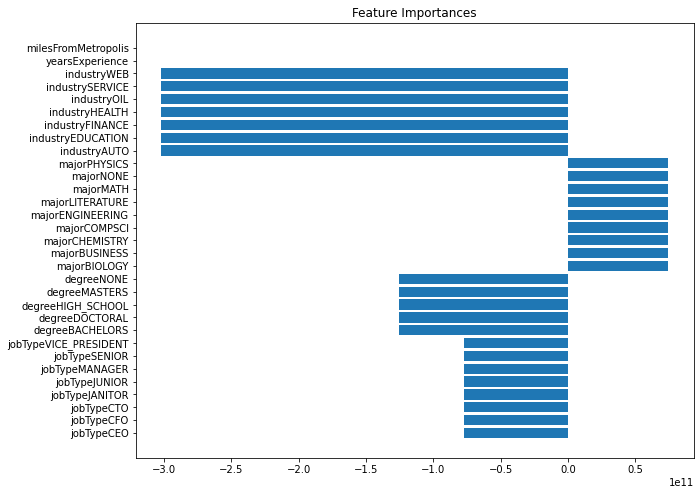

CPU times: user 630 ms, sys: 265 ms, total: 895 ms
Wall time: 690 ms


In [89]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lin = LinearRegression()
size = 100000

# Fit the model to the data
lin.fit(X_train.iloc[:size,:], y_train[:size])
train_pred = lin.predict(X_train)
test_pred = lin.predict(X_test)


# print score of the model by calling function
evaluation_metrics(train_pred, y_train, data='train')
evaluation_metrics(test_pred, y_test, data='test')


# visualizing the importance of features.
feature_importance_visualization(lin.coef_, X_train) # plotting coefficient values instead of feature imp


### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

train RMSE score: 0.0647754391949128
train MSE score: 0.004195857522893845
train R2 score: 0.6832057372844176
--------------------------------------------------
test RMSE score: 0.06829293780537443
test MSE score: 0.004663925354088741
test R2 score: 0.6430927700391524
--------------------------------------------------


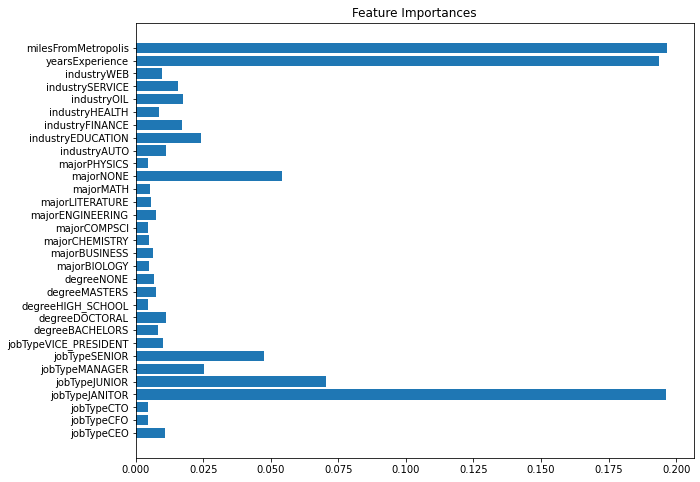

CPU times: user 1min 21s, sys: 1.39 s, total: 1min 22s
Wall time: 1min 22s


In [90]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf_model = RandomForestRegressor()
size = 100000

# Fit the model to the data
rf_model.fit(X_train.iloc[:size,:], y_train[:size])
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)


# print score of the model by calling function
evaluation_metrics(train_pred, y_train, data='train')
evaluation_metrics(test_pred, y_test, data='test')


# visualizing the importance of features.
feature_importance_visualization(rf_model.feature_importances_, X_train)



### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

train RMSE score: 0.064531396804325
train MSE score: 0.004164301173517247
train R2 score: 0.6192176730309342
--------------------------------------------------
test RMSE score: 0.06444224178926786
test MSE score: 0.004152802526826461
test R2 score: 0.620141952809131
--------------------------------------------------


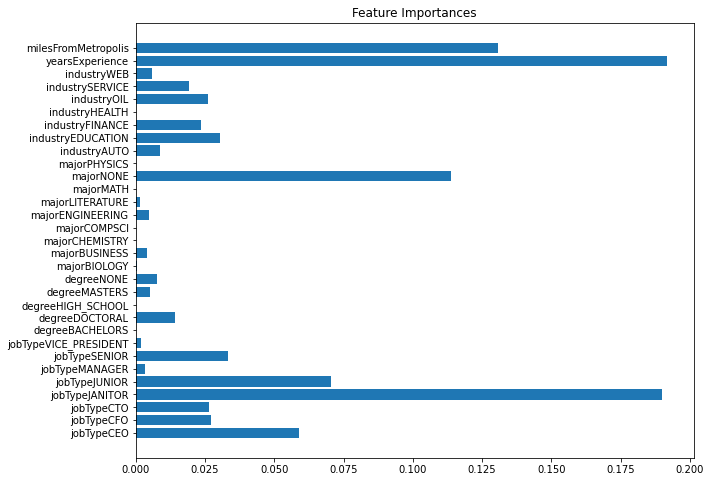

CPU times: user 7.57 s, sys: 136 ms, total: 7.71 s
Wall time: 7.68 s


In [91]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Instantiate the model
grad_model = GradientBoostingRegressor()
size = 50000

# Fit the model to the data
grad_model.fit(X_train.iloc[:size,:], y_train[:size])
train_pred = grad_model.predict(X_train)
test_pred = grad_model.predict(X_test)


# print score of the model by calling function
evaluation_metrics(train_pred, y_train, data='train')
evaluation_metrics(test_pred, y_test, data='test')


# visualizing the importance of features.
feature_importance_visualization(grad_model.feature_importances_, X_train)


### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

train RMSE score: 0.08553967396208714
train MSE score: 0.00731703582154017
train R2 score: 0.5631428040589033
--------------------------------------------------
test RMSE score: 0.09096712384721391
test MSE score: 0.008275017621034353
test R2 score: 0.5057744273425837
--------------------------------------------------


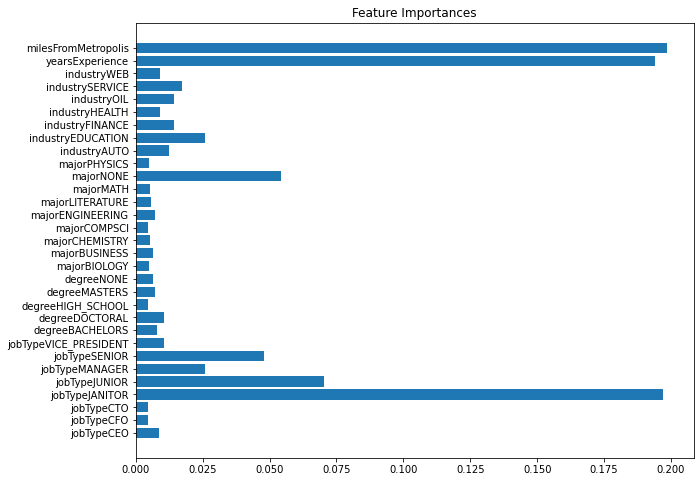

CPU times: user 2.56 s, sys: 65.1 ms, total: 2.63 s
Wall time: 2.6 s


In [92]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor


# Instantiate the model
tree_model = DecisionTreeRegressor()
size = 100000

# Fit the model to the data
tree_model.fit(X_train.iloc[:size,:], y_train[:size])
train_pred = tree_model.predict(X_train)
test_pred = tree_model.predict(X_test)


# print score of the model by calling function
evaluation_metrics(train_pred, y_train, data='train')
evaluation_metrics(test_pred, y_test, data='test')


# visualizing the importance of features.
feature_importance_visualization(tree_model.feature_importances_, X_train)



### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

train RMSE score: 0.0844448616383488
train MSE score: 0.0071309346571198735
train R2 score: 0.20107809230708762
--------------------------------------------------
test RMSE score: 0.08432777772283694
test MSE score: 0.007111174095672194
test R2 score: 0.2034947753556734
--------------------------------------------------


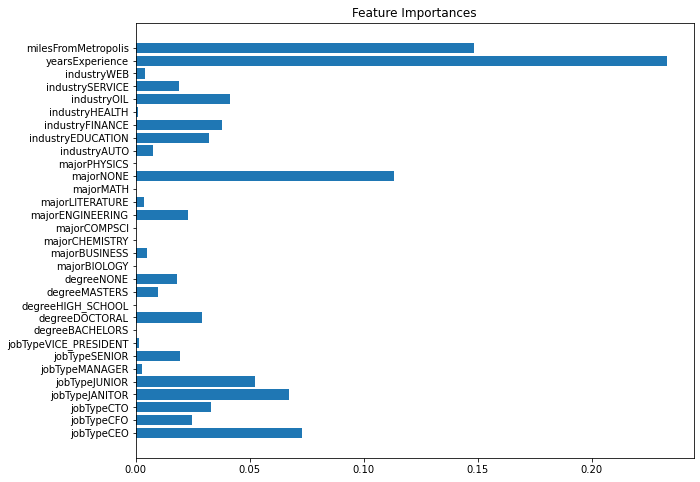

CPU times: user 19.5 s, sys: 1.23 s, total: 20.7 s
Wall time: 20.7 s


In [93]:
%%time

# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor 


# Instantiate the model
ada_model = AdaBoostRegressor()
size = 100000

# Fit the model to the data
ada_model.fit(X_train.iloc[:size,:], y_train[:size])
train_pred = ada_model.predict(X_train)
test_pred = ada_model.predict(X_test)


# print score of the model by calling function
evaluation_metrics(train_pred, y_train, data='train')
evaluation_metrics(test_pred, y_test, data='test')


# visualizing the importance of features.
feature_importance_visualization(ada_model.feature_importances_, X_train)


### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In [94]:
!pip install xgboost

[05:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train RMSE score: 0.06445715137409178
train MSE score: 0.004154724363262582
train R2 score: 0.6171988097510532
--------------------------------------------------
test RMSE score: 0.06434837665209861
test MSE score: 0.00414071357776035
test R2 score: 0.6182392027377038
--------------------------------------------------


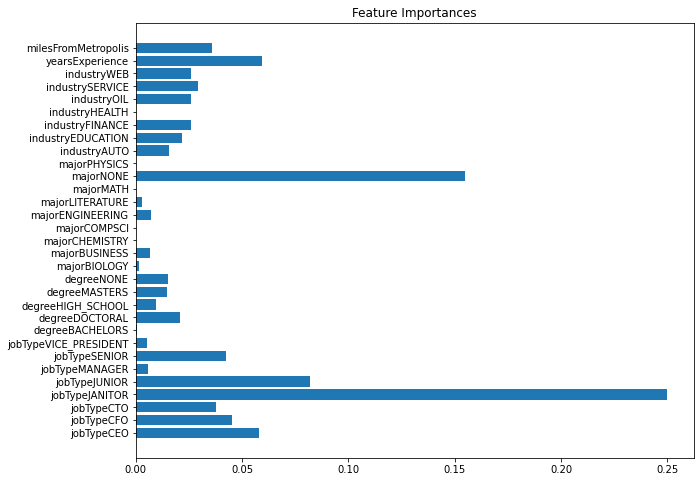

CPU times: user 15.7 s, sys: 242 ms, total: 15.9 s
Wall time: 18.5 s


In [95]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor


# Instantiate the model
xgb_model = XGBRegressor()
size = 100000

# Fit the model to the data
xgb_model.fit(X_train.iloc[:size,:], y_train[:size])
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)


# print score of the model by calling function
evaluation_metrics(train_pred, y_train, data='train')
evaluation_metrics(test_pred, y_test, data='test')


# visualizing the importance of features.
feature_importance_visualization(xgb_model.feature_importances_, X_train)


### Comparing all the model based on metric

In [96]:
# Helper function for comparing models metrics
def comparison_of_metrics(models, names, X_train, y_train, X_test, y_test):
    data = {'metrics': ['MAE','MSE','RMSE','R2_score']}
    train_metrics = pd.DataFrame(data)
    test_metrics = pd.DataFrame(data)

    # get metrics of each model, and add to dataframe 
    for (model, name) in zip(models, names):
        train_res = [mean_absolute_error(model.predict(X_train),y_train), mean_squared_error(model.predict(X_train),y_train), \
                    np.sqrt(mean_squared_error(model.predict(X_train),y_train)), r2_score(model.predict(X_train),y_train)]
        train_metrics[name] = train_res
        
        test_res = [mean_absolute_error(model.predict(X_test),y_test), mean_squared_error(model.predict(X_test),y_test), \
                    np.sqrt(mean_squared_error(model.predict(X_test),y_test)), r2_score(model.predict(X_test),y_test)]
        test_metrics[name] = test_res
        
    return train_metrics, test_metrics
        

In [97]:
# list of models object
models = [lin, rf_model, grad_model, ada_model, xgb_model, tree_model]
names = ['LR', 'RF', 'Grad_boost','ada_boost','XGBoost','decision_tree']

# use function for comparing models by passing list of models object, names, train and test data
train_met, test_met = comparison_of_metrics(models, names, X_train, y_train, X_test, y_test)
print(train_met)
print(test_met)

    metrics        LR        RF  Grad_boost  ada_boost   XGBoost  \
0       MAE  0.052678  0.050545    0.052097   0.070209  0.052059   
1       MSE  0.004249  0.004196    0.004164   0.007131  0.004155   
2      RMSE  0.065185  0.064775    0.064531   0.084445  0.064457   
3  R2_score  0.655541  0.683206    0.619218   0.201078  0.617199   

   decision_tree  
0       0.062602  
1       0.007317  
2       0.085540  
3       0.563143  
    metrics        LR        RF  Grad_boost  ada_boost   XGBoost  \
0       MAE  0.052535  0.054551    0.052029   0.070046  0.051976   
1       MSE  0.004227  0.004664    0.004153   0.007111  0.004141   
2      RMSE  0.065019  0.068293    0.064442   0.084328  0.064348   
3  R2_score  0.657432  0.643093    0.620142   0.203495  0.618239   

   decision_tree  
0       0.070908  
1       0.008275  
2       0.090967  
3       0.505774  


#### RMSE of all model on train and test data

In [98]:
# printing rmse comparision of model on train and test

print(train_met.loc[2,:])
print(test_met.loc[2,:])

metrics              RMSE
LR               0.065185
RF               0.064775
Grad_boost       0.064531
ada_boost        0.084445
XGBoost          0.064457
decision_tree     0.08554
Name: 2, dtype: object
metrics              RMSE
LR               0.065019
RF               0.068293
Grad_boost       0.064442
ada_boost        0.084328
XGBoost          0.064348
decision_tree    0.090967
Name: 2, dtype: object


> XG Boost model has lower Root mean square value than all other models, but although all models are working pretty well on the dataset since model's RMSE, MSE values are lower which means the predicted values are almost equal to the true values

## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [99]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

def hyper_parameter_tuning(model, param_dict, cv, X_train, y_train):
    
    # Random search of parameters, using 3 fold cross validation, 
    random_cv = RandomizedSearchCV(model, param_dict, cv=cv, n_iter=40, scoring='neg_root_mean_squared_error', n_jobs=-1)
    # search across 40 different combinations, and use all available cores
    random_cv.fit(X_train.iloc[:50000,:], y_train[:50000])
  
    # print best parameters
    print(random_cv.best_params_)
 

In [100]:
# create RandomForest parameters dict for tunning
rf_param_grid = {'n_estimators': [int(x) for x in np.linspace(200,2000,10)],
             'max_features': ['auto', 'sqrt'],
             'max_depth': [int(x) for x in np.linspace(7,70,10)],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'bootstrap': [True, False]
             }

# passing data for hyper parameter tunning with Randomized search cv
hyper_parameter_tuning(RandomForestRegressor(), rf_param_grid, 3, X_train, y_train)

{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 63, 'bootstrap': True}


* Here we have tried only for Random Forest model as it takes higher CPU power and memory 
* It is possible to do tuning for all other models and select the best among those
* Going ahead with RF model as it provides good results 

### Now working with the test dataset provided

In [101]:
# test data 

test.head()

0  jobType       degree    major industry  yearsExperience  \
1  MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
2   JUNIOR         NONE     NONE     AUTO               20   
3      CTO      MASTERS  BIOLOGY   HEALTH               17   
4  MANAGER  HIGH_SCHOOL     NONE      OIL               14   
5   JUNIOR     DOCTORAL  BIOLOGY      OIL               10   

0  milesFromMetropolis  
1                   73  
2                   47  
3                    9  
4                   96  
5                   44

In [102]:
# passing test data for scaling, similarly as done for train data

cols = ['yearsExperience','milesFromMetropolis']
test_df = scaling_features(test, cols)
test_df.head()

0  jobType       degree    major industry  yearsExperience  \
1  MANAGER  HIGH_SCHOOL     NONE   HEALTH         0.416667   
2   JUNIOR         NONE     NONE     AUTO         0.125000   
3      CTO      MASTERS  BIOLOGY   HEALTH         0.416667   
4  MANAGER  HIGH_SCHOOL     NONE      OIL         0.333333   
5   JUNIOR     DOCTORAL  BIOLOGY      OIL         0.333333   

0  milesFromMetropolis  
1             0.838384  
2             0.737374  
3             0.383838  
4             0.171717  
5             0.161616

In [103]:
# passing test dataset for one hot encoding process

test_cat = test_df.drop(['yearsExperience','milesFromMetropolis'], axis=1)
data = encoder.transform(test_cat)
df = pd.concat([data, test_df[['yearsExperience','milesFromMetropolis']]], axis=1)
df.head()

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
1         0.0         0.0         0.0             0.0            0.0   
2         0.0         0.0         0.0             0.0            1.0   
3         0.0         0.0         1.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            0.0   
5         0.0         0.0         0.0             0.0            1.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
1             1.0            0.0                    0.0              0.0   
2             0.0            0.0                    0.0              0.0   
3             0.0            0.0                    0.0              0.0   
4             1.0            0.0                    0.0              0.0   
5             0.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
1             0.0  ...           0.0           0.0                0.0   
2             0.0  ...           0.0           1.0                0.0   
3             0.0  ...           0.0           0.0                0.0   
4             0.0  ...           0.0           0.0                0.0   
5             1.0  ...           0.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
1              0.0             1.0          0.0              0.0          0.0   
2              0.0             0.0          0.0              0.0          0.0   
3              0.0             1.0          0.0              0.0          0.0   
4              0.0             0.0          1.0              0.0          0.0   
5              0.0             0.0          1.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
1         0.416667             0.838384  
2         0.125000             0.737374  
3         0.416667             0.383838  
4         0.333333             0.171717  
5         0.333333             0.161616  

[5 rows x 31 columns]

In [106]:
# Training again with Tuned RF model 

rf_model = RandomForestRegressor(n_estimators = 600, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 63, bootstrap = True)

# Predicting on test data with above model

size = 100000
rf_model.fit(X_train.iloc[:size,:], y_train[:size])

predictions = rf_model.predict(df)


In [107]:
# creating a dataframe of predicted results 
pred = pd.DataFrame(predictions, columns=['prediction'])

In [109]:
print(len(pred))

1000000


In [108]:
# predicted values in dataframe
pred.head()

prediction
0    0.299277
1    0.177852
2    0.499941
3    0.380902
4    0.401737

### Conclusion

According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.
Even though we use only 100000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of Random Forest model alone and found our prediction prediction.